In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,8)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('Titanic_train.csv')
train_data.head()

test_data = pd.read_csv('Titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.duplicated().sum()

0

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
# Droping the irrelevant column "Name" from  both training nad testing dataset.

In [10]:
train_data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
test_data.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [11]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
num_columns = [col for col in train_data.columns if train_data[col].dtype != 'O']
cat_columns = [col for col in train_data.columns if train_data[col].dtype == 'O']

print('Numerical Columns :', num_columns)
print('Categorical Columns :', cat_columns)

Numerical Columns : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns : ['Sex', 'Cabin', 'Embarked']


Survived


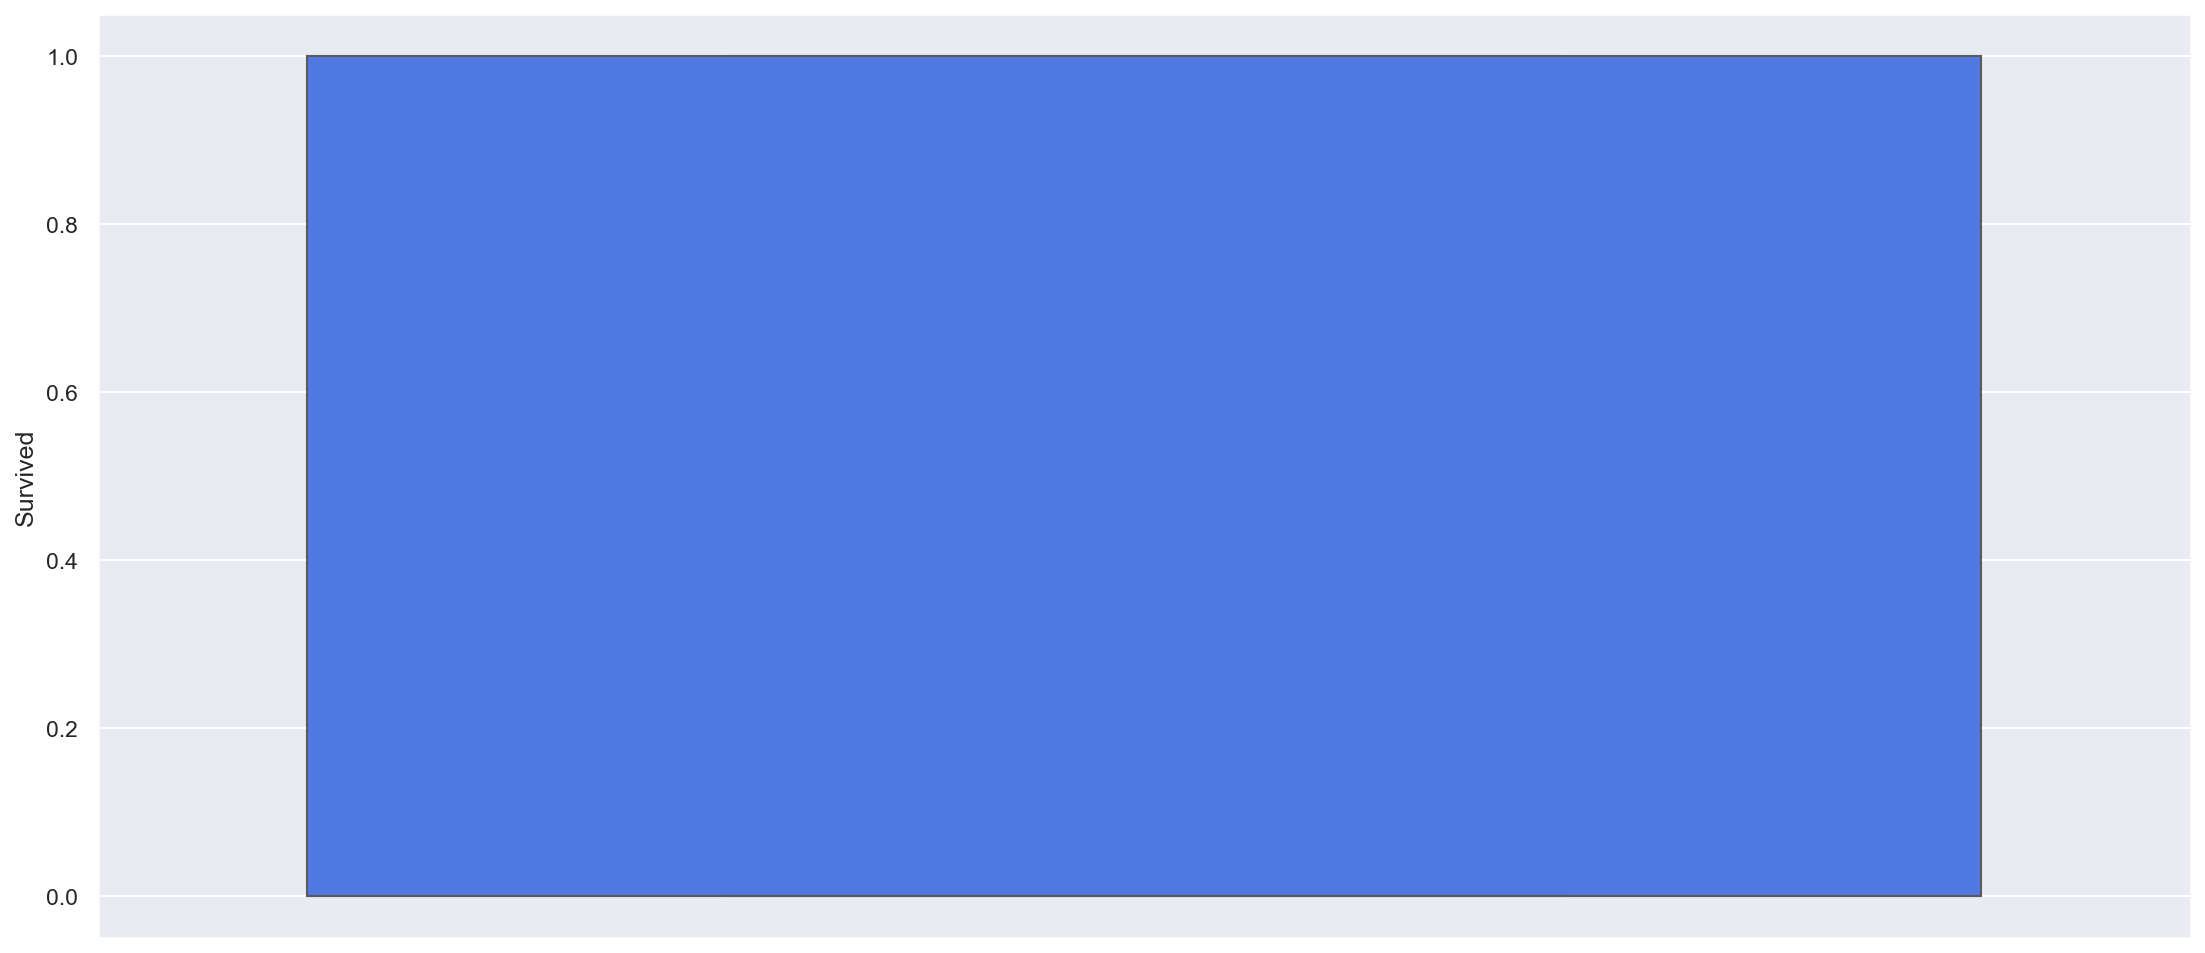


Pclass


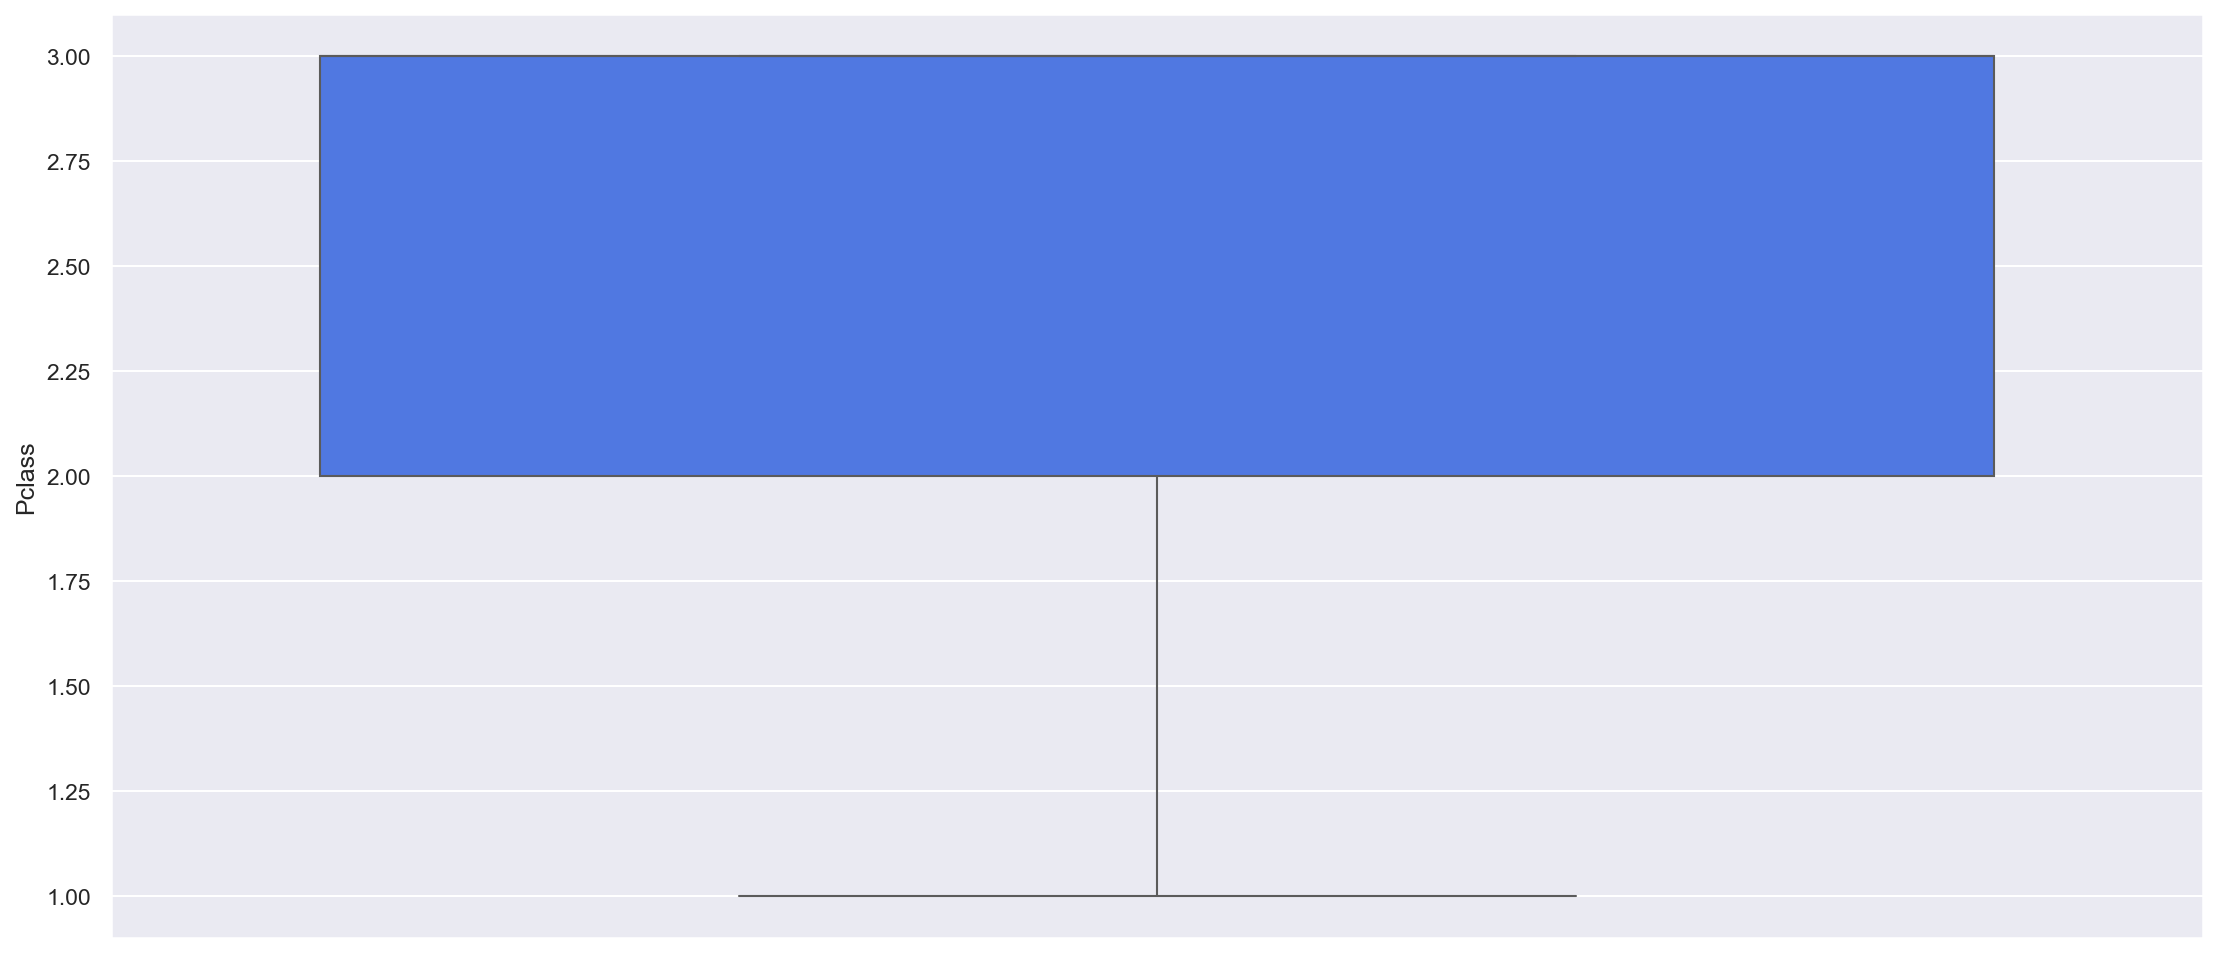


Age


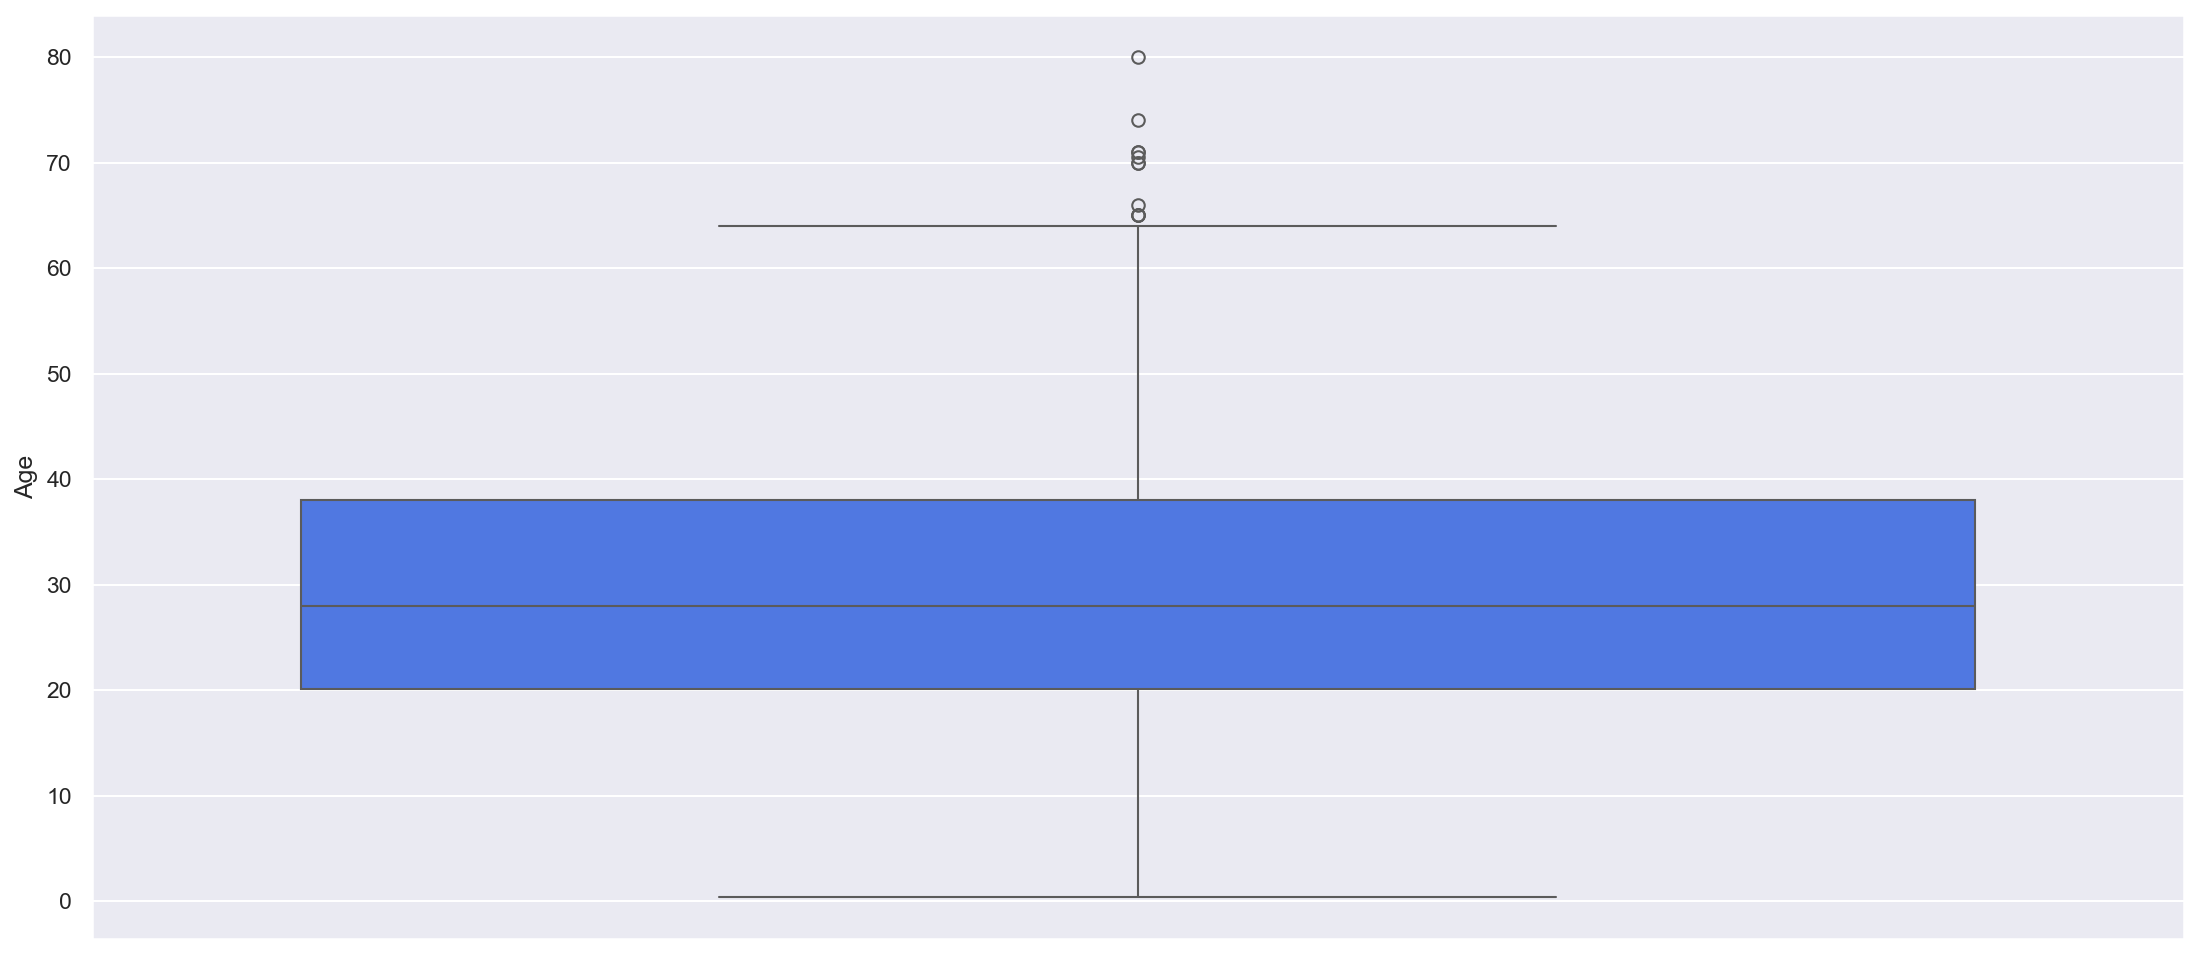


SibSp


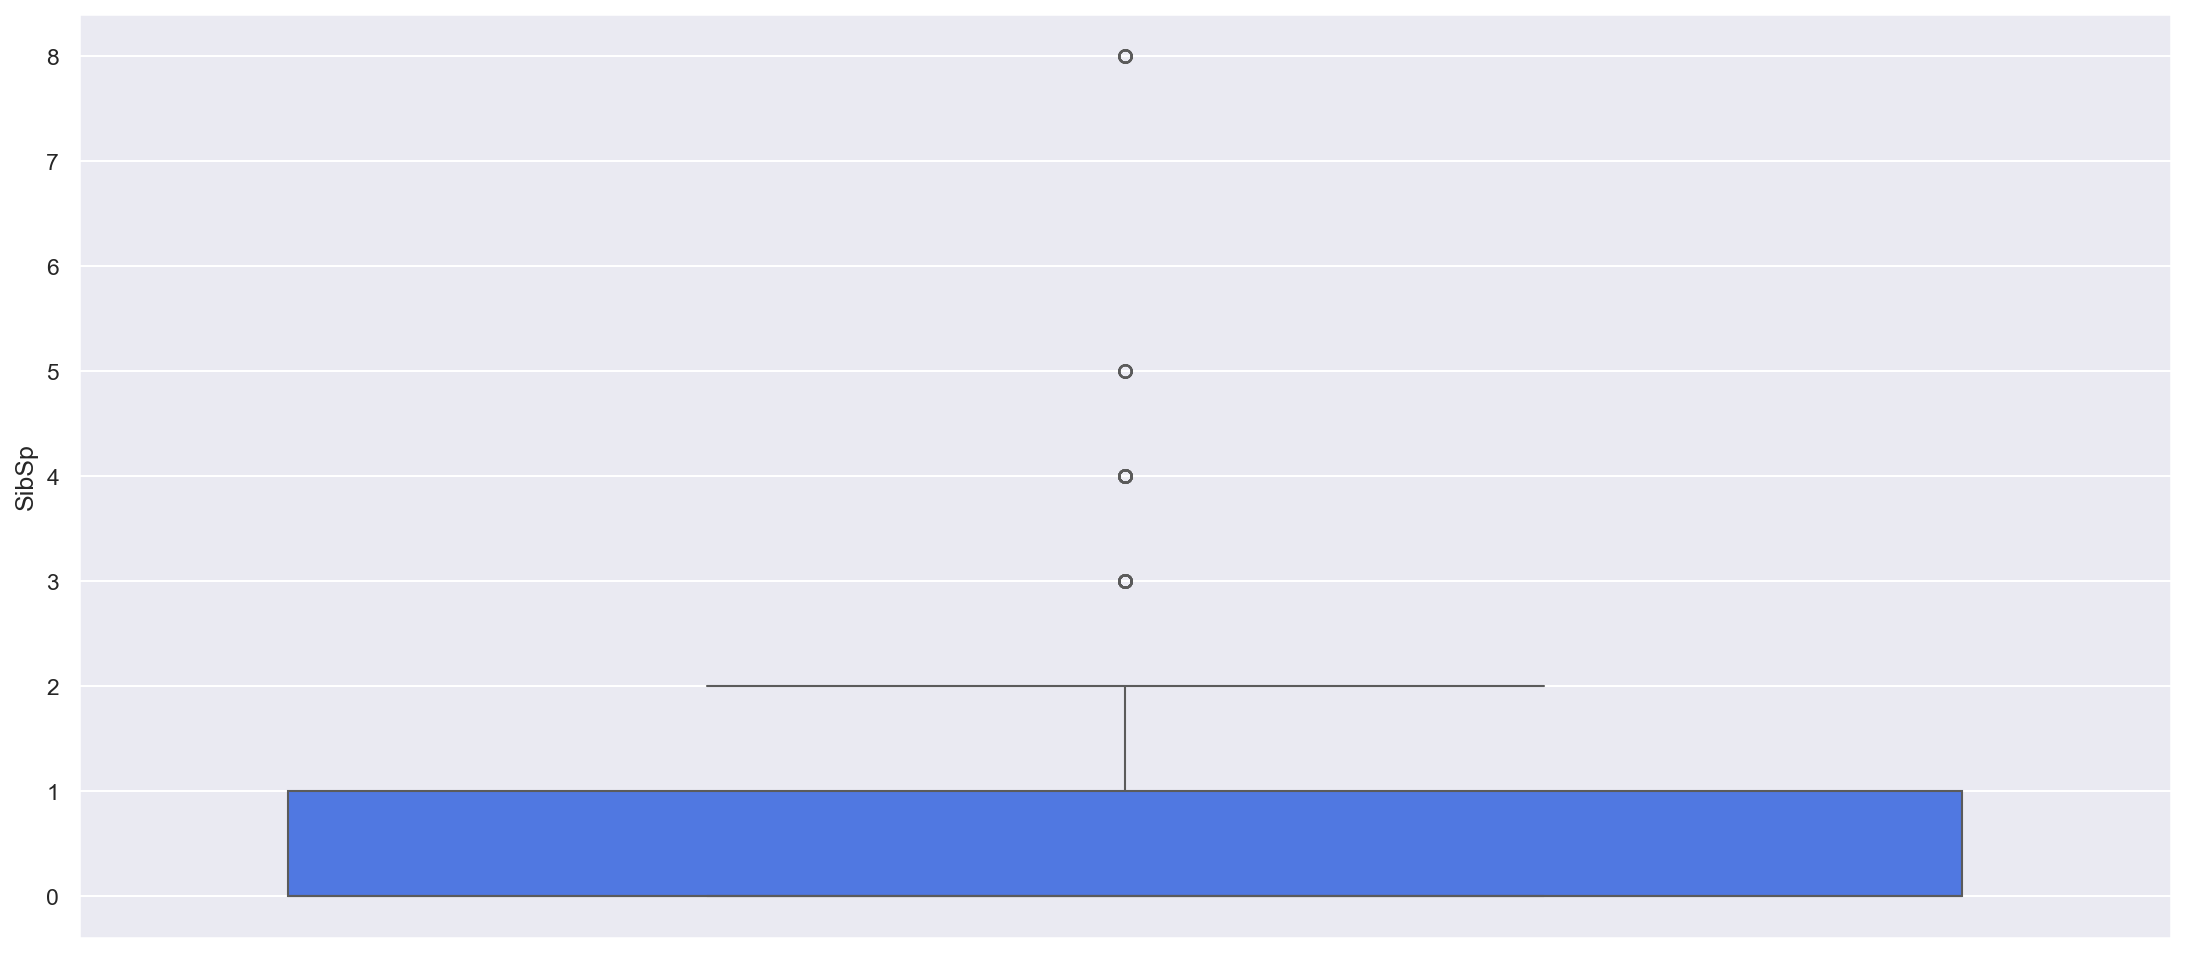


Parch


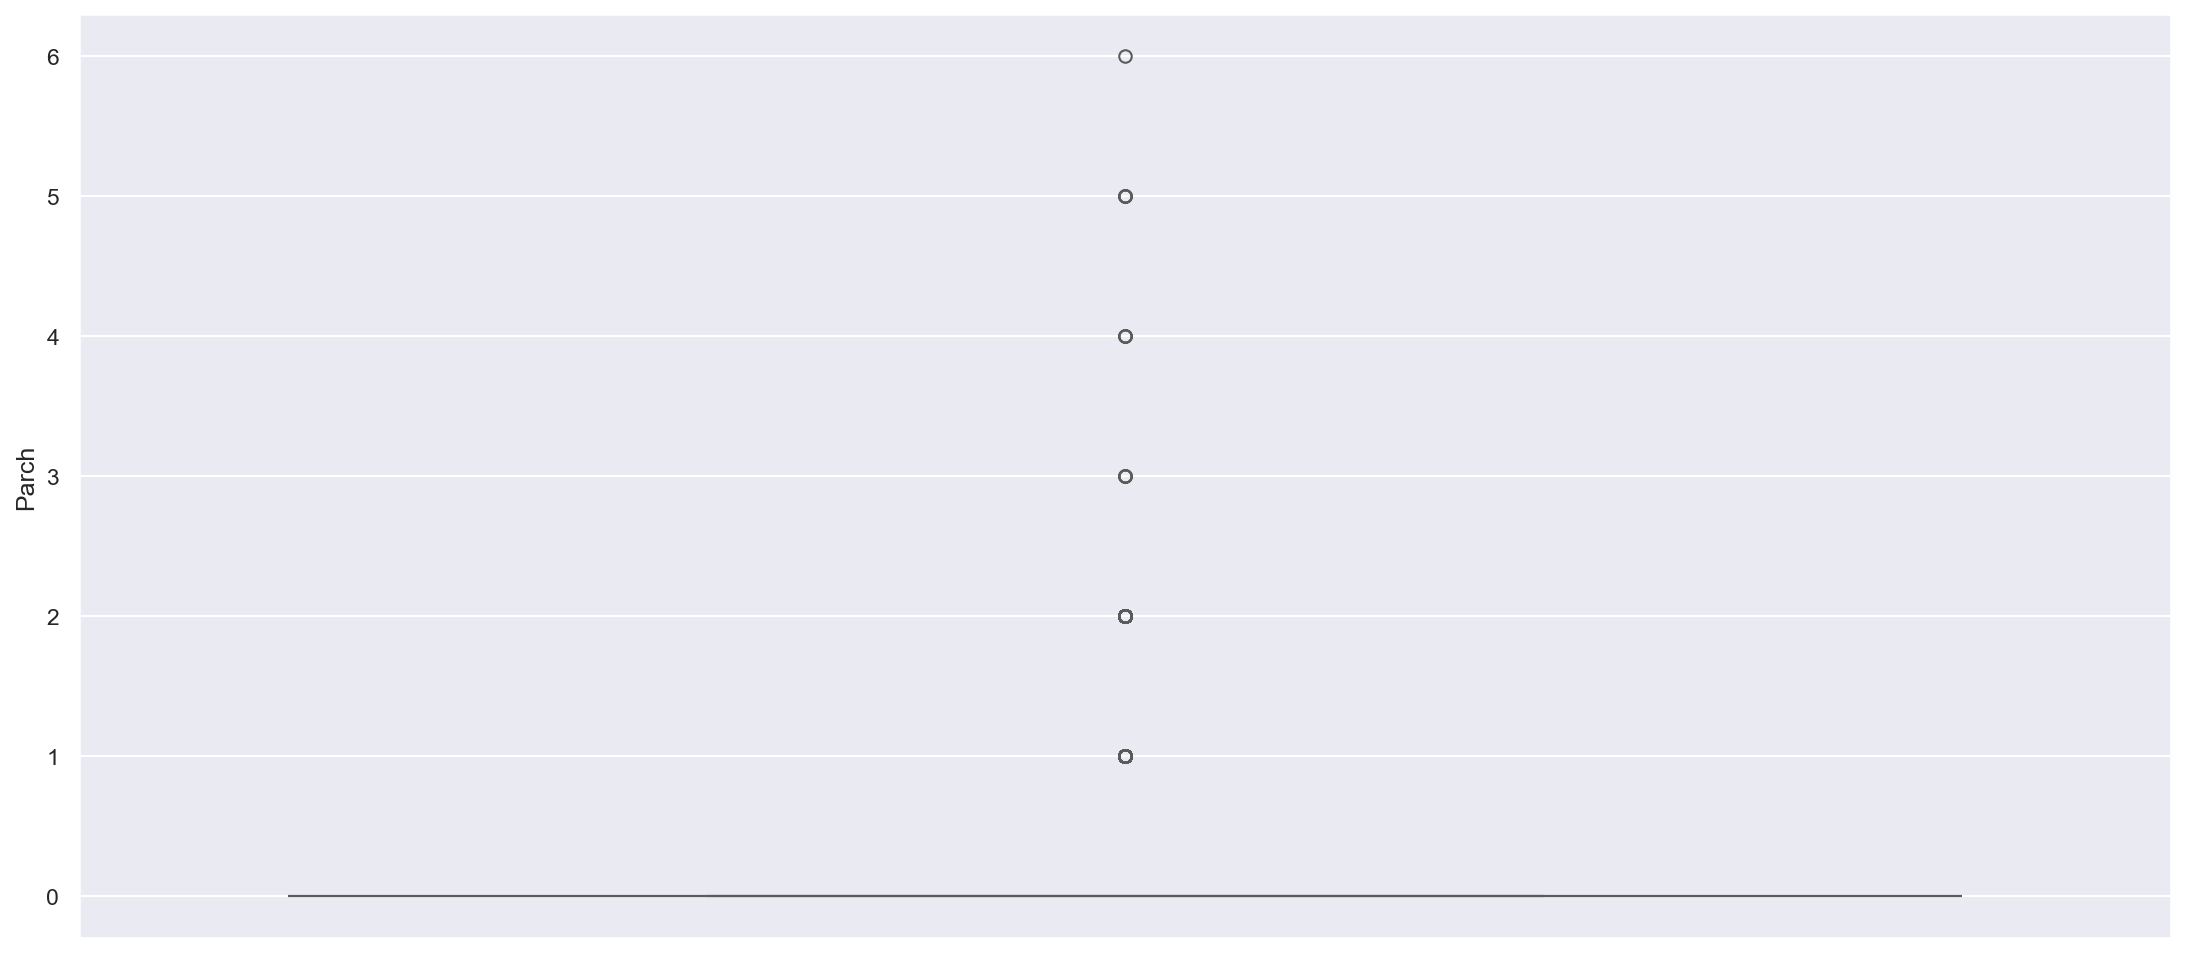


Fare


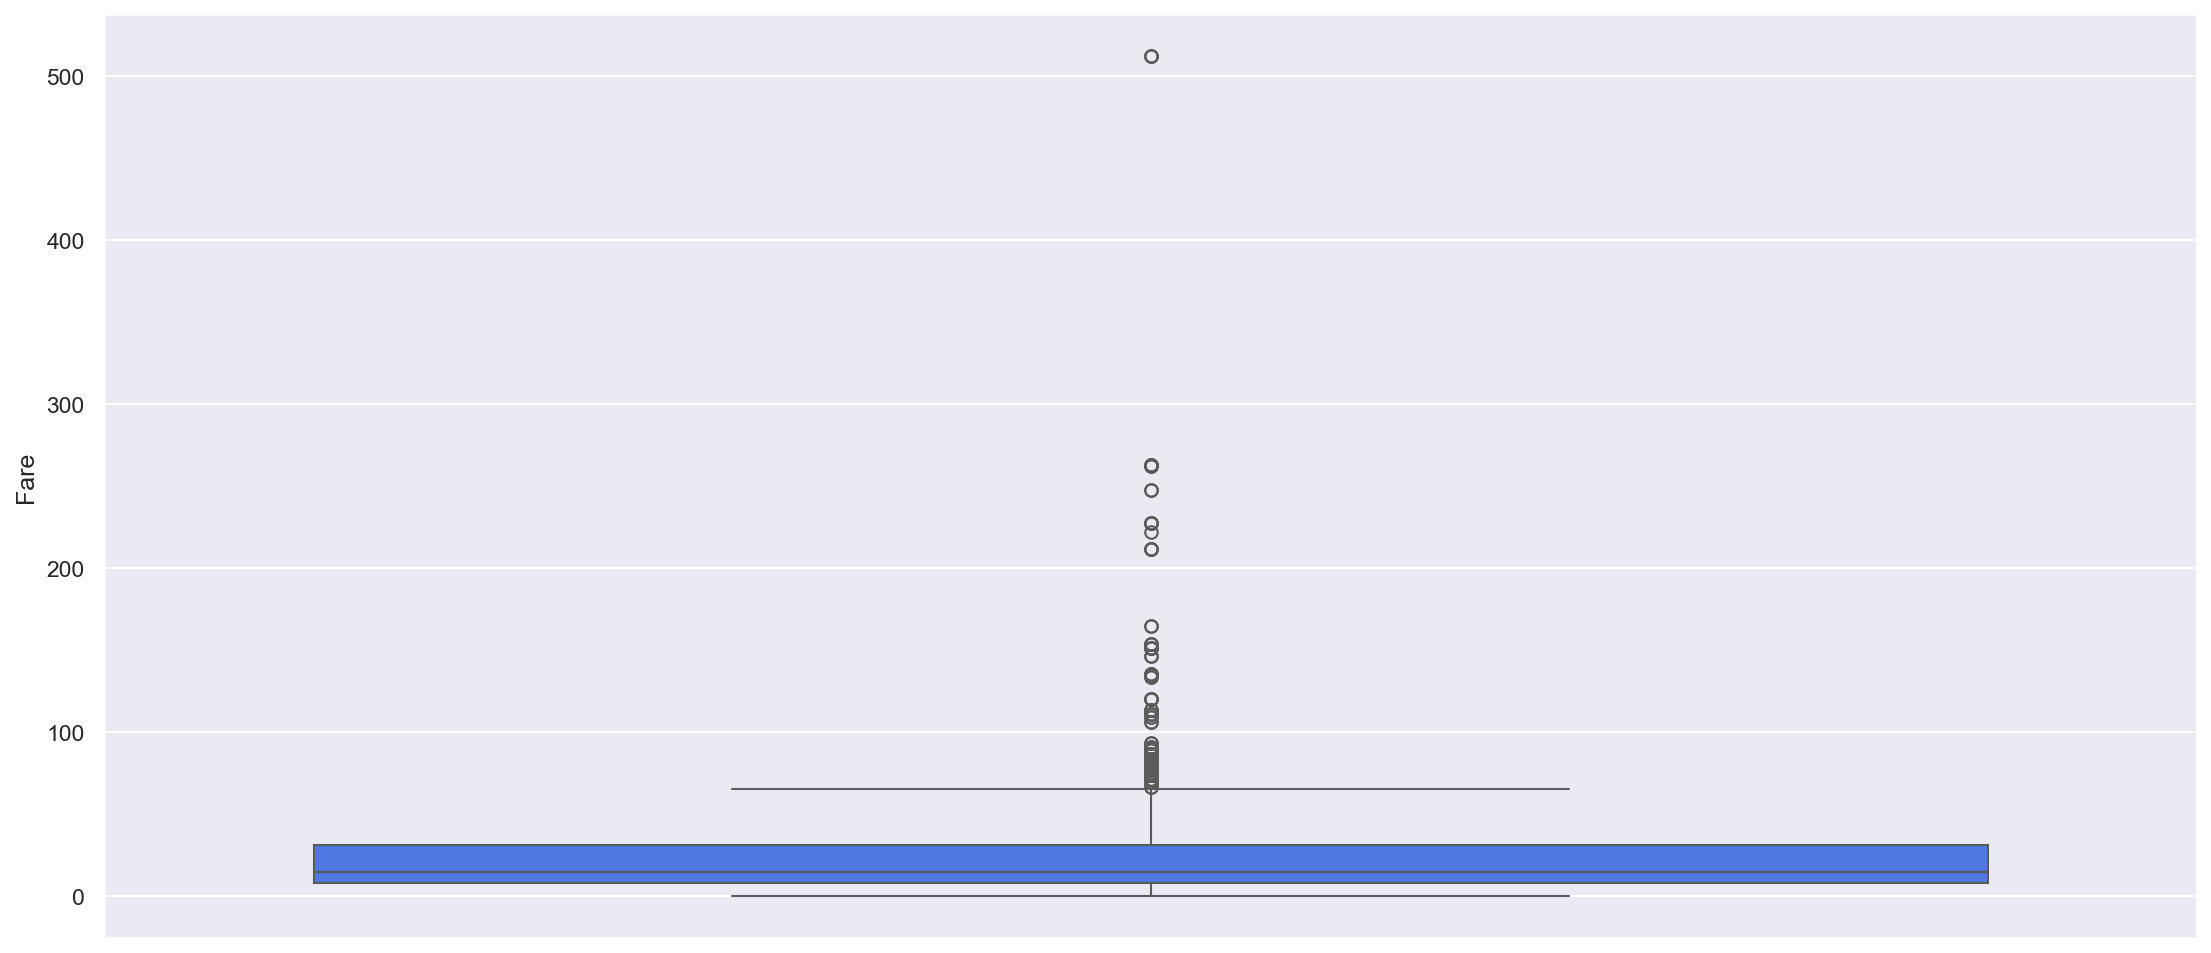

In [13]:
# For training data.
for col in num_columns:
    print(col)
    sns.boxplot(train_data[col])
    plt.show()
    print()

Sex


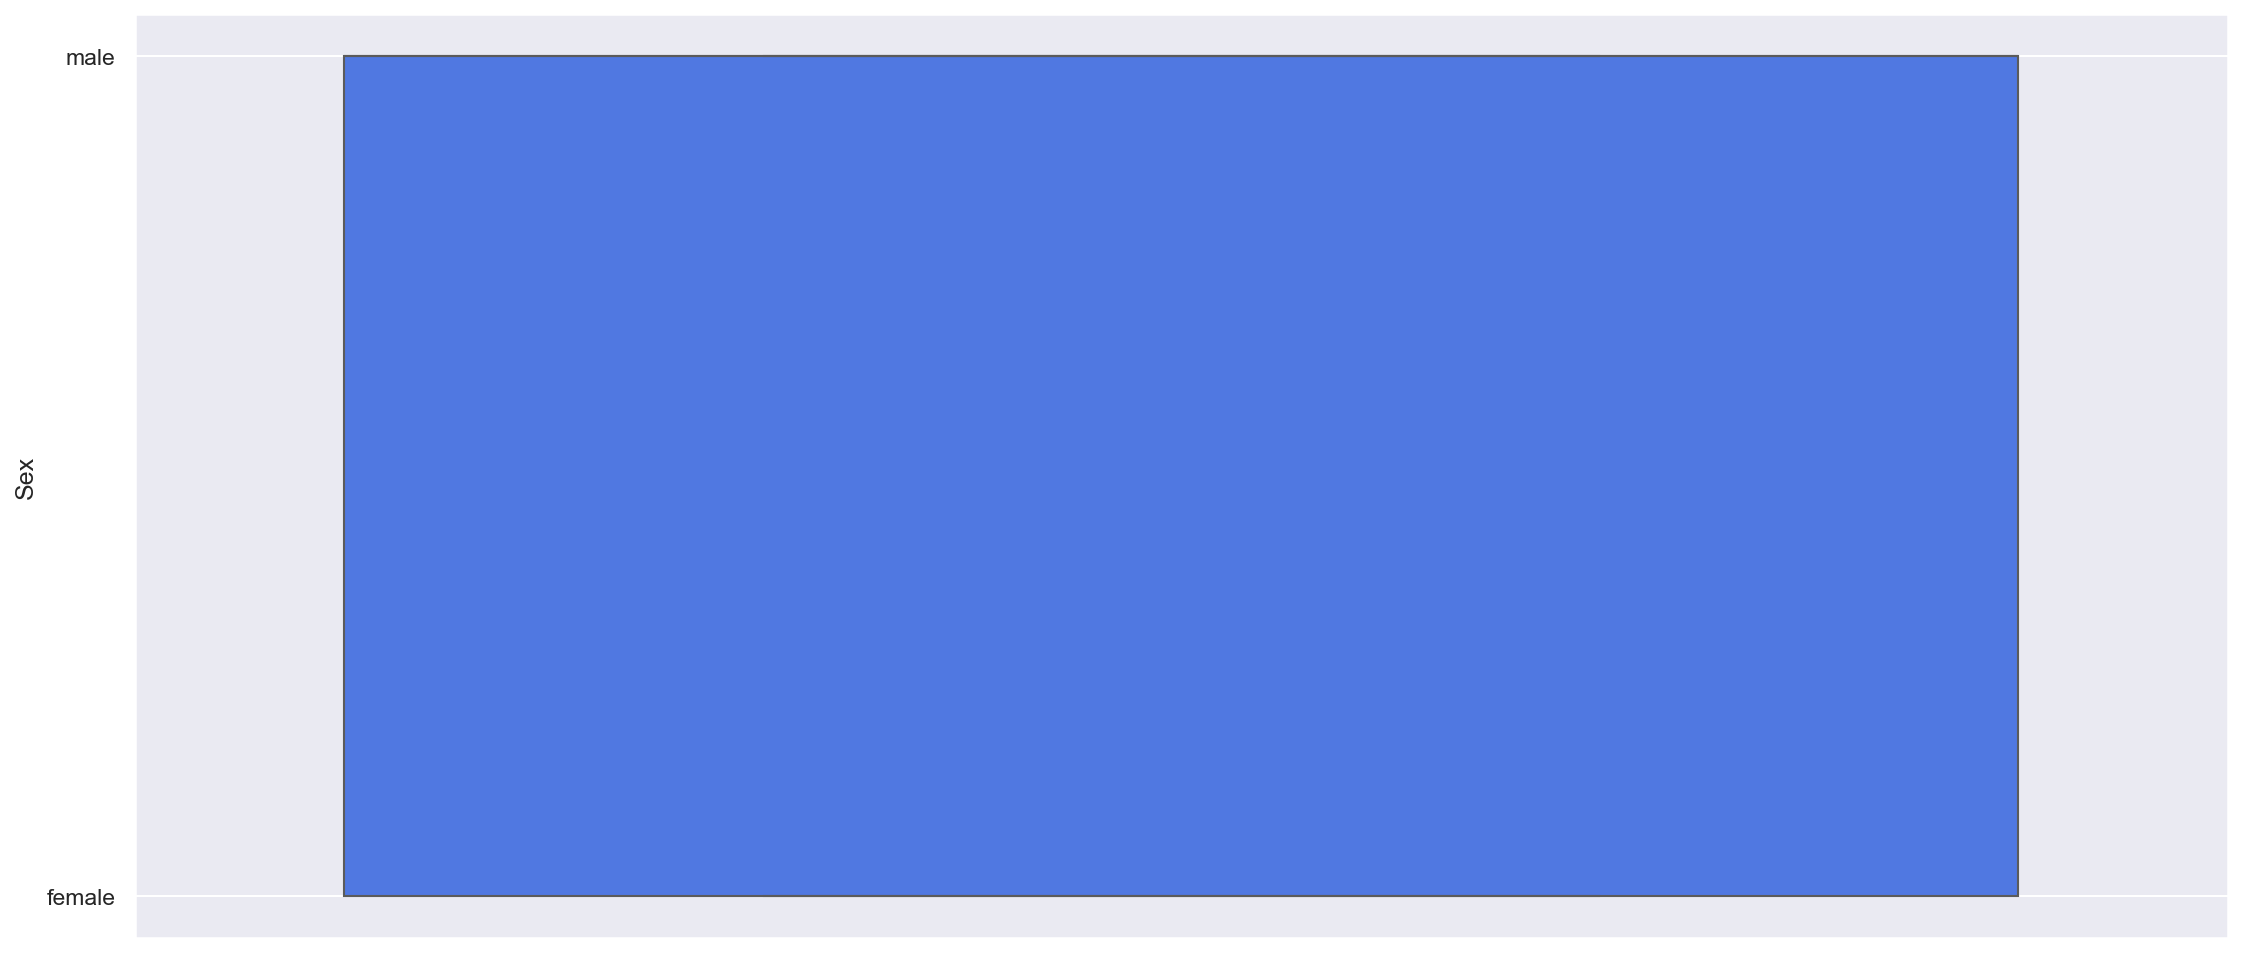


Cabin


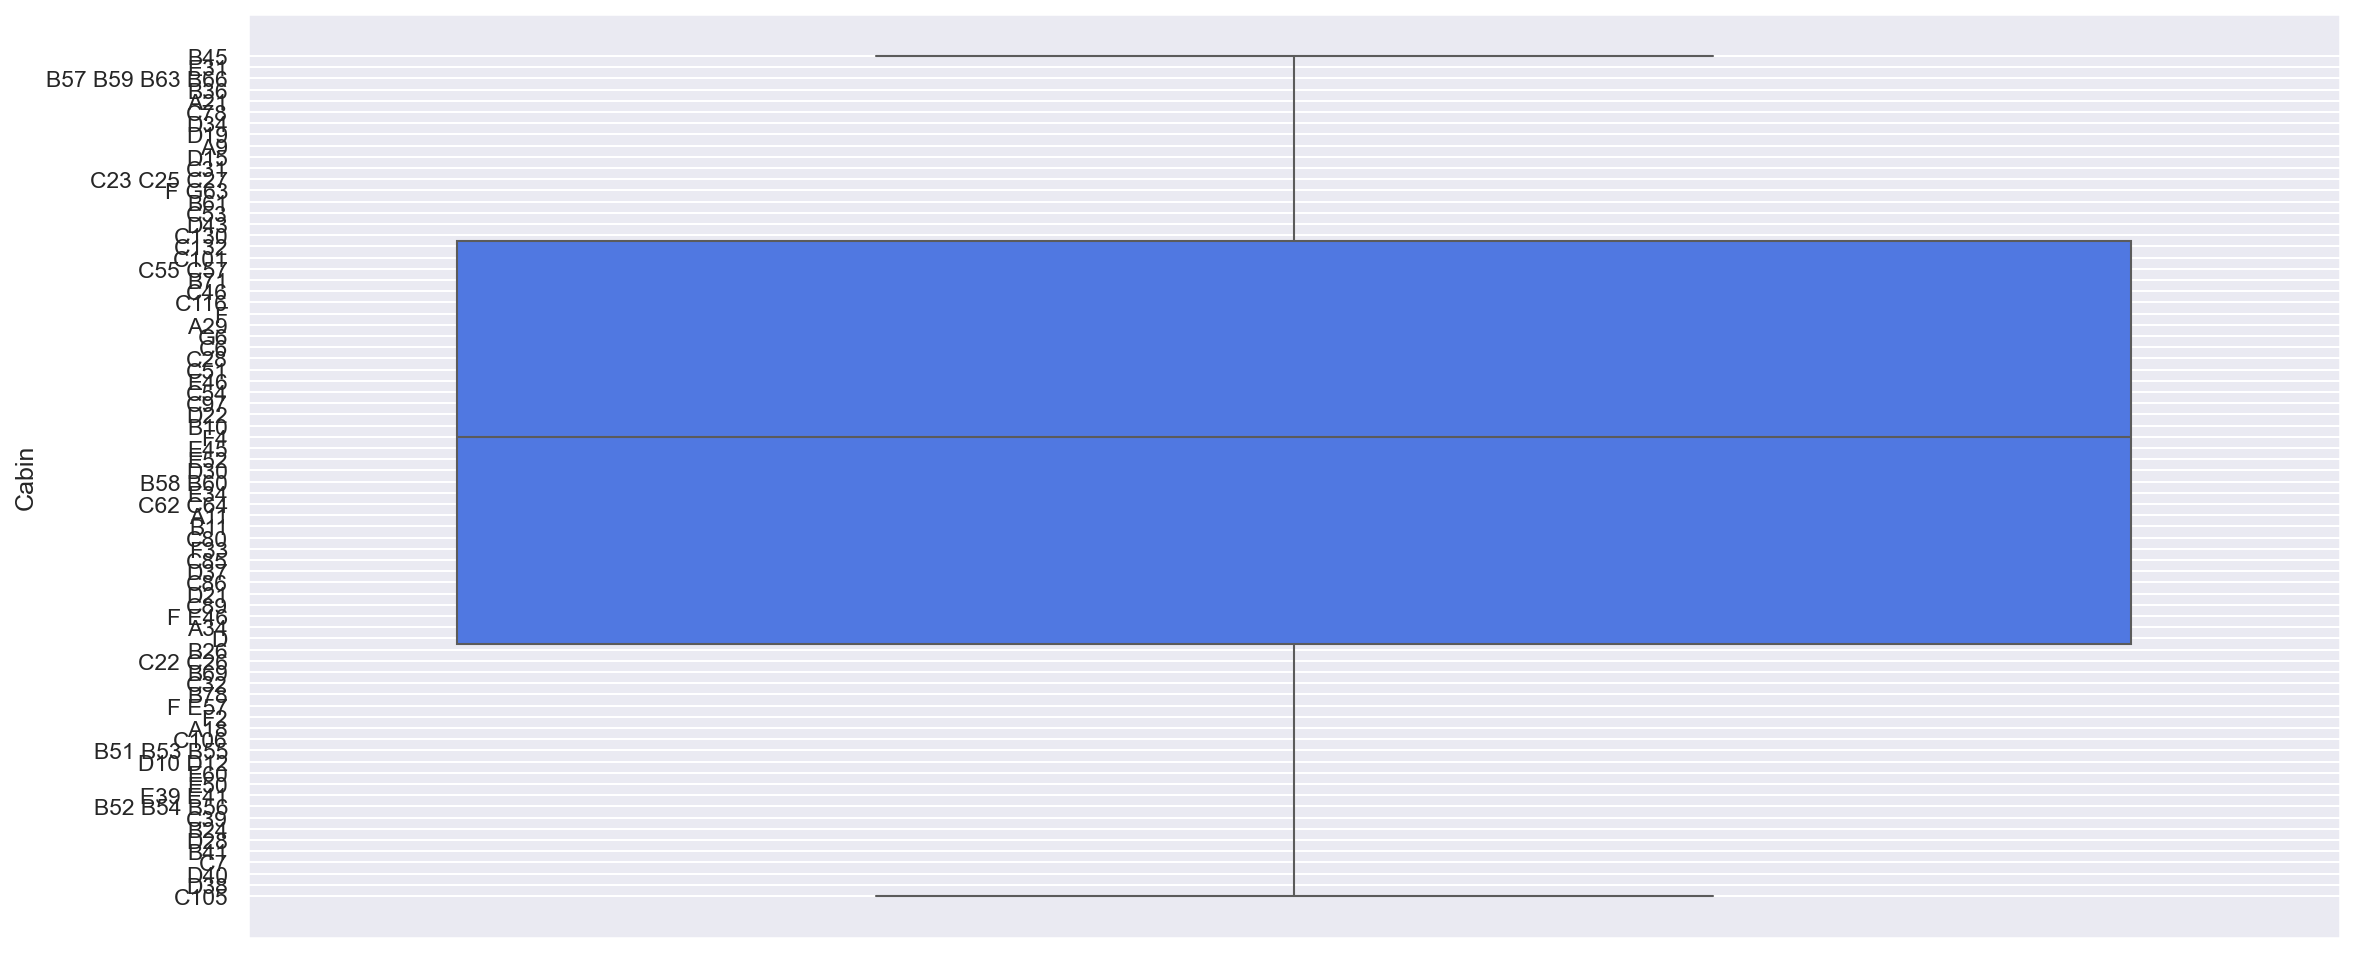


Embarked


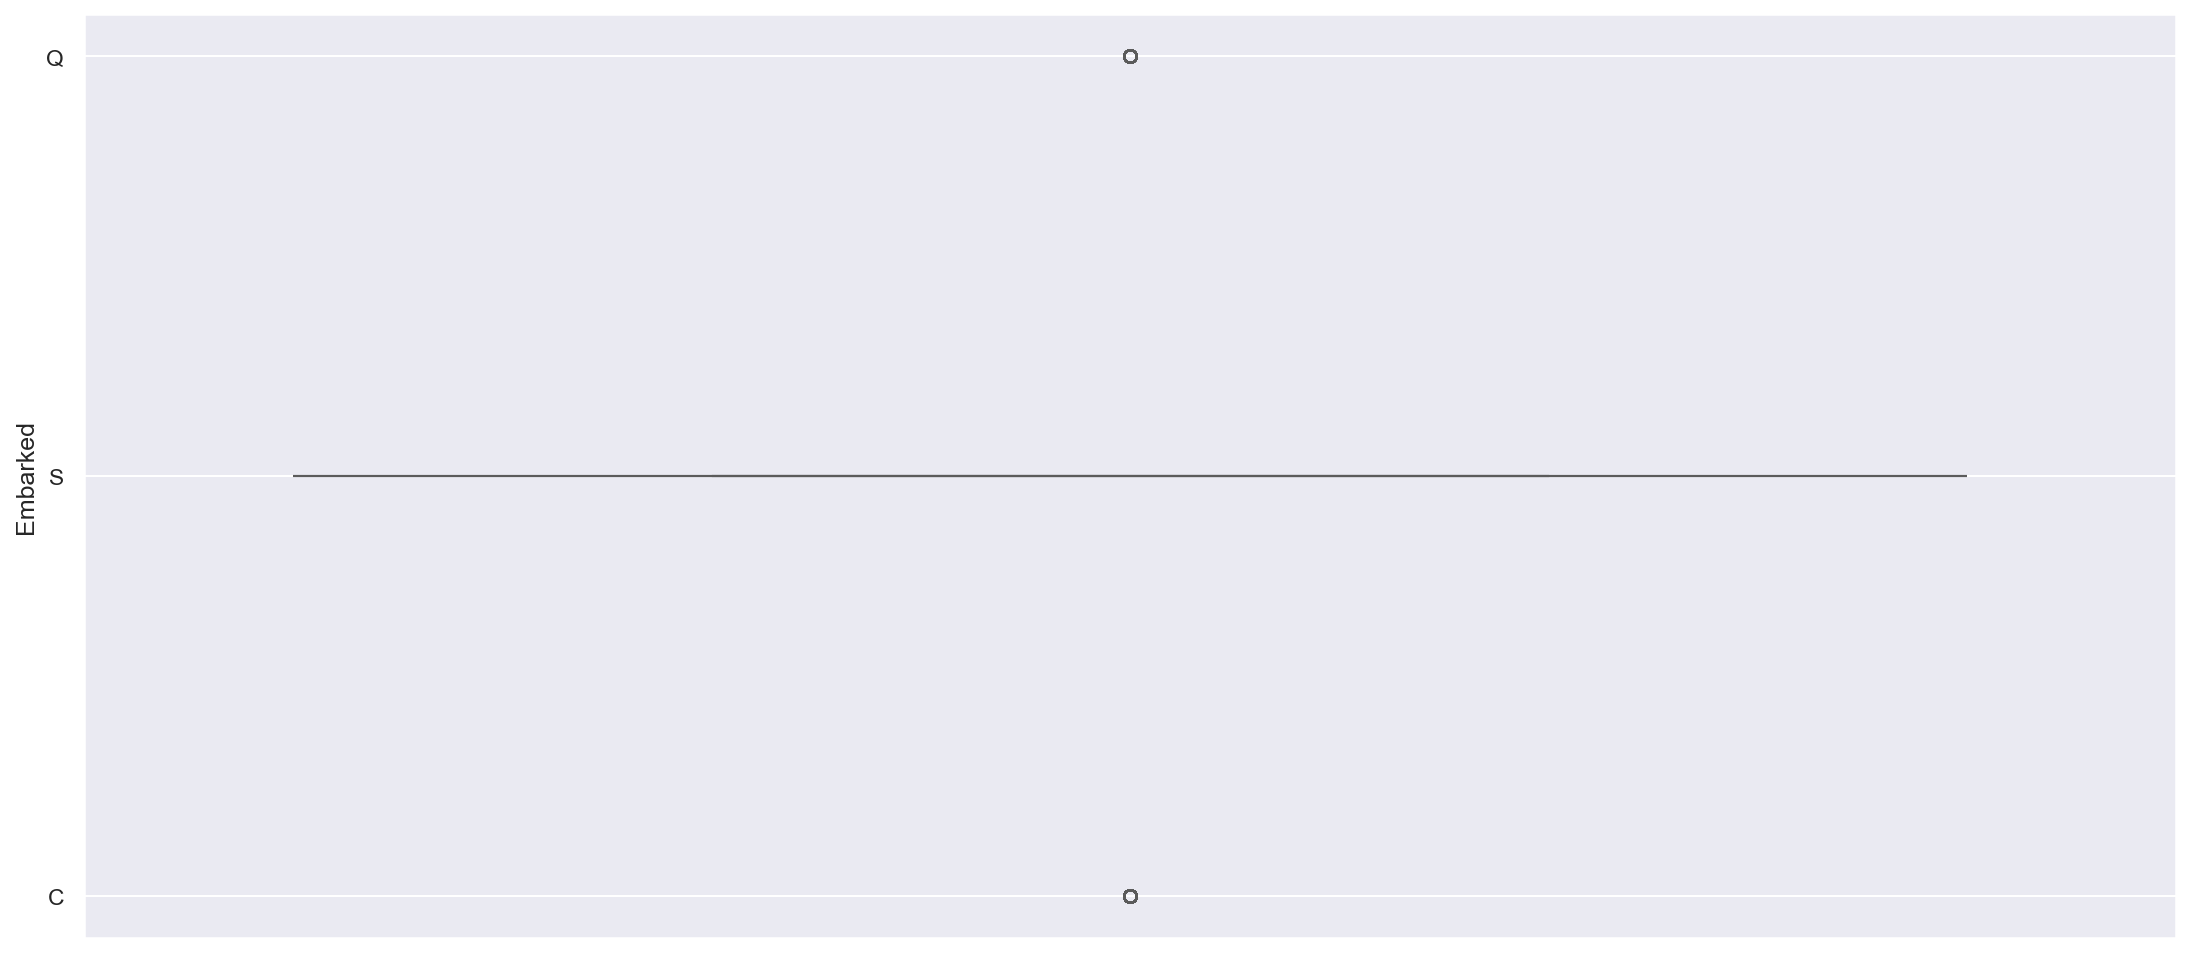

In [14]:
# For testig dataset
for col in cat_columns:
    print(col)
    sns.boxplot(test_data[col])
    plt.show()
    print()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

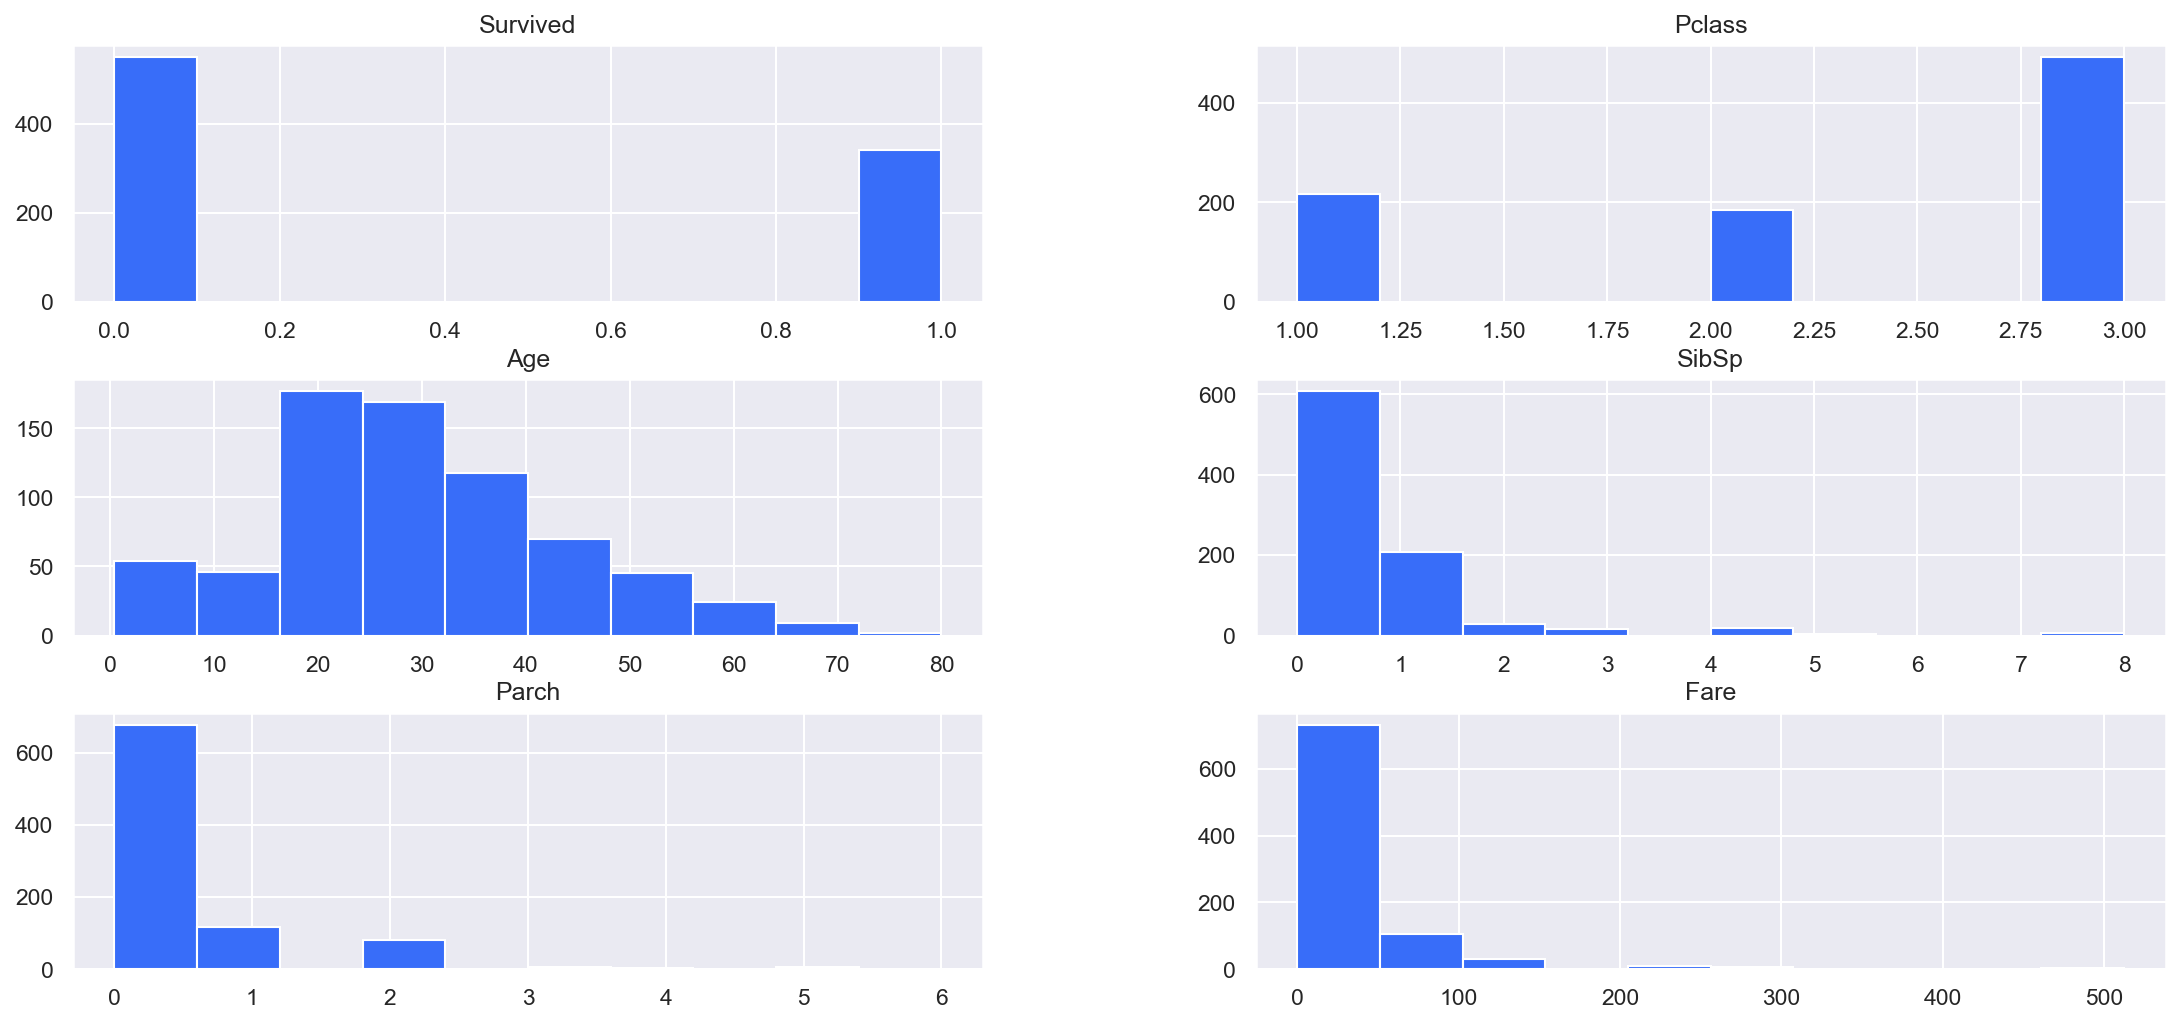

In [15]:
train_data.hist()

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

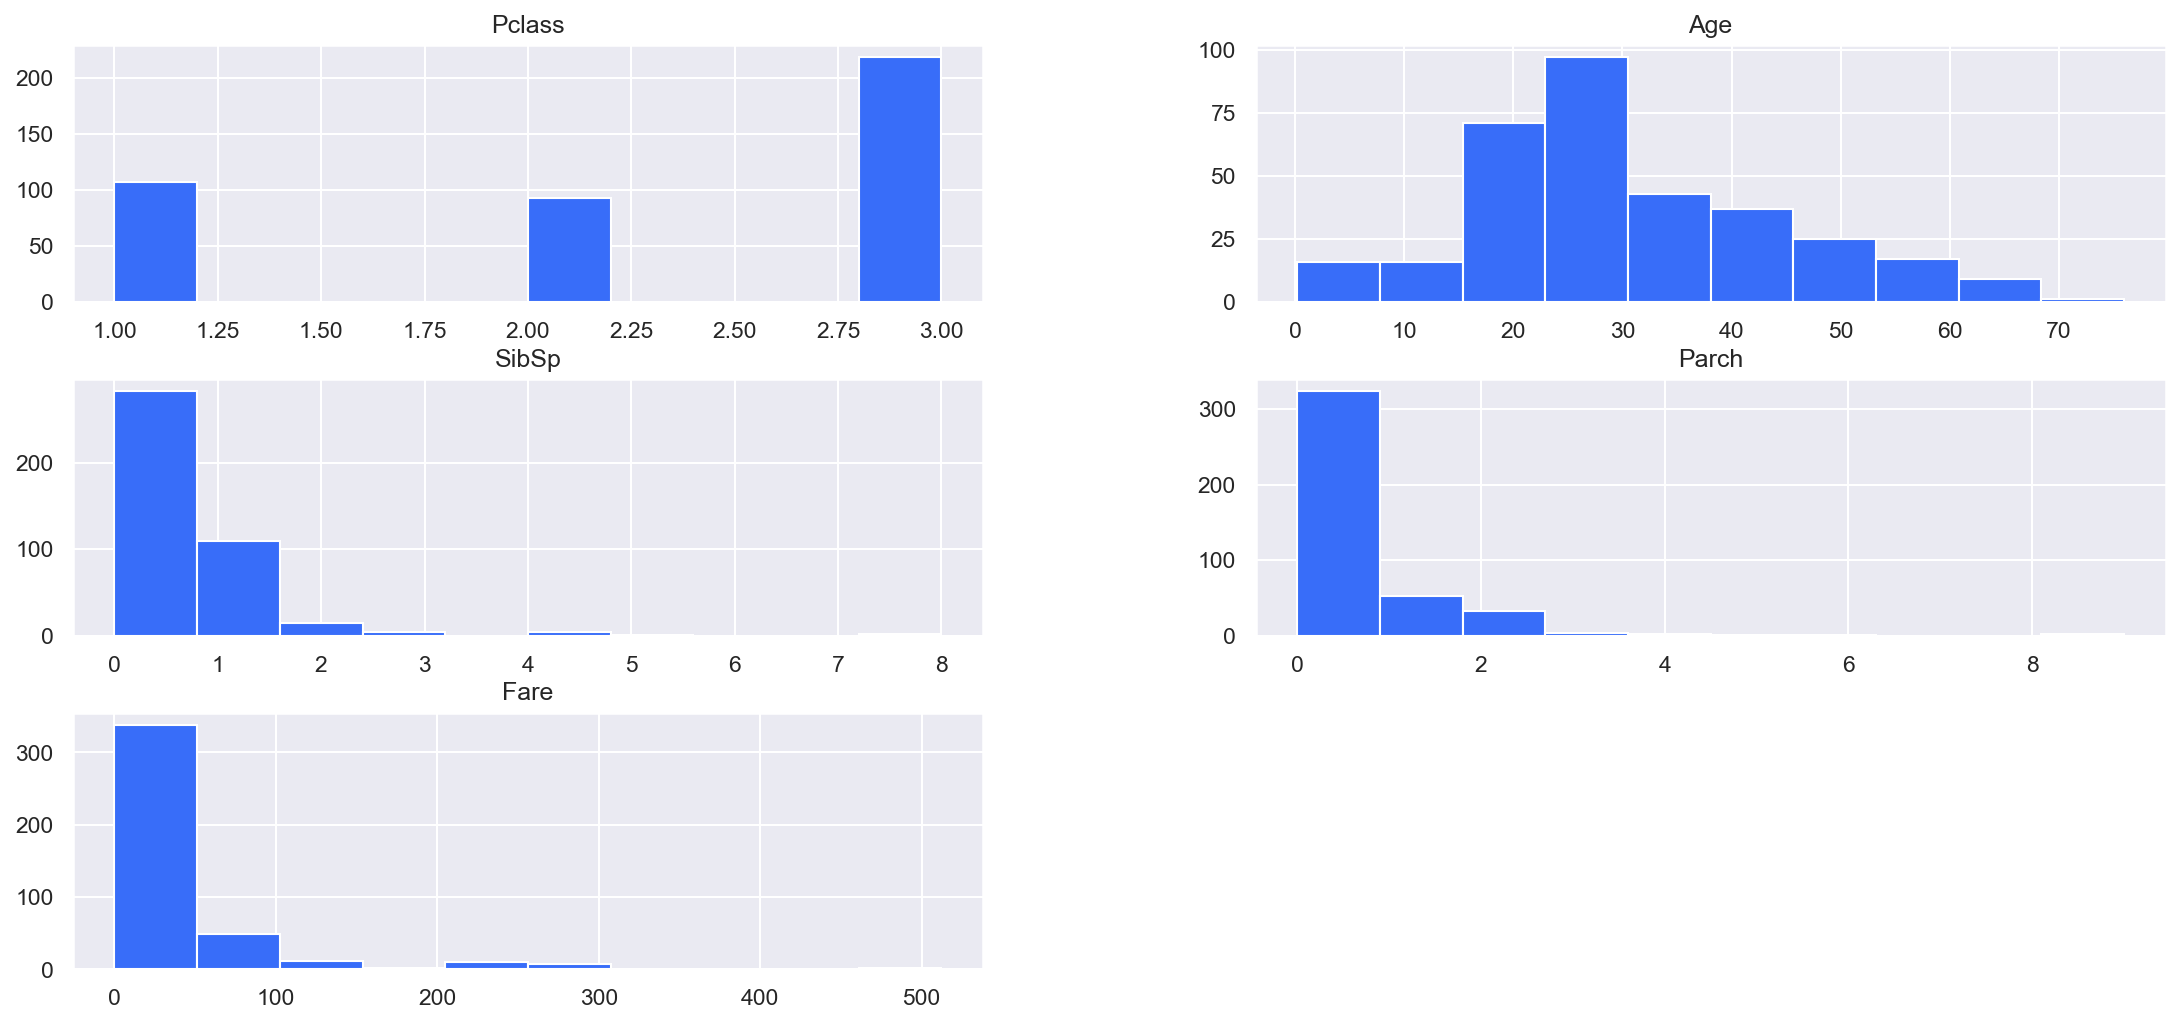

In [16]:
test_data.hist()

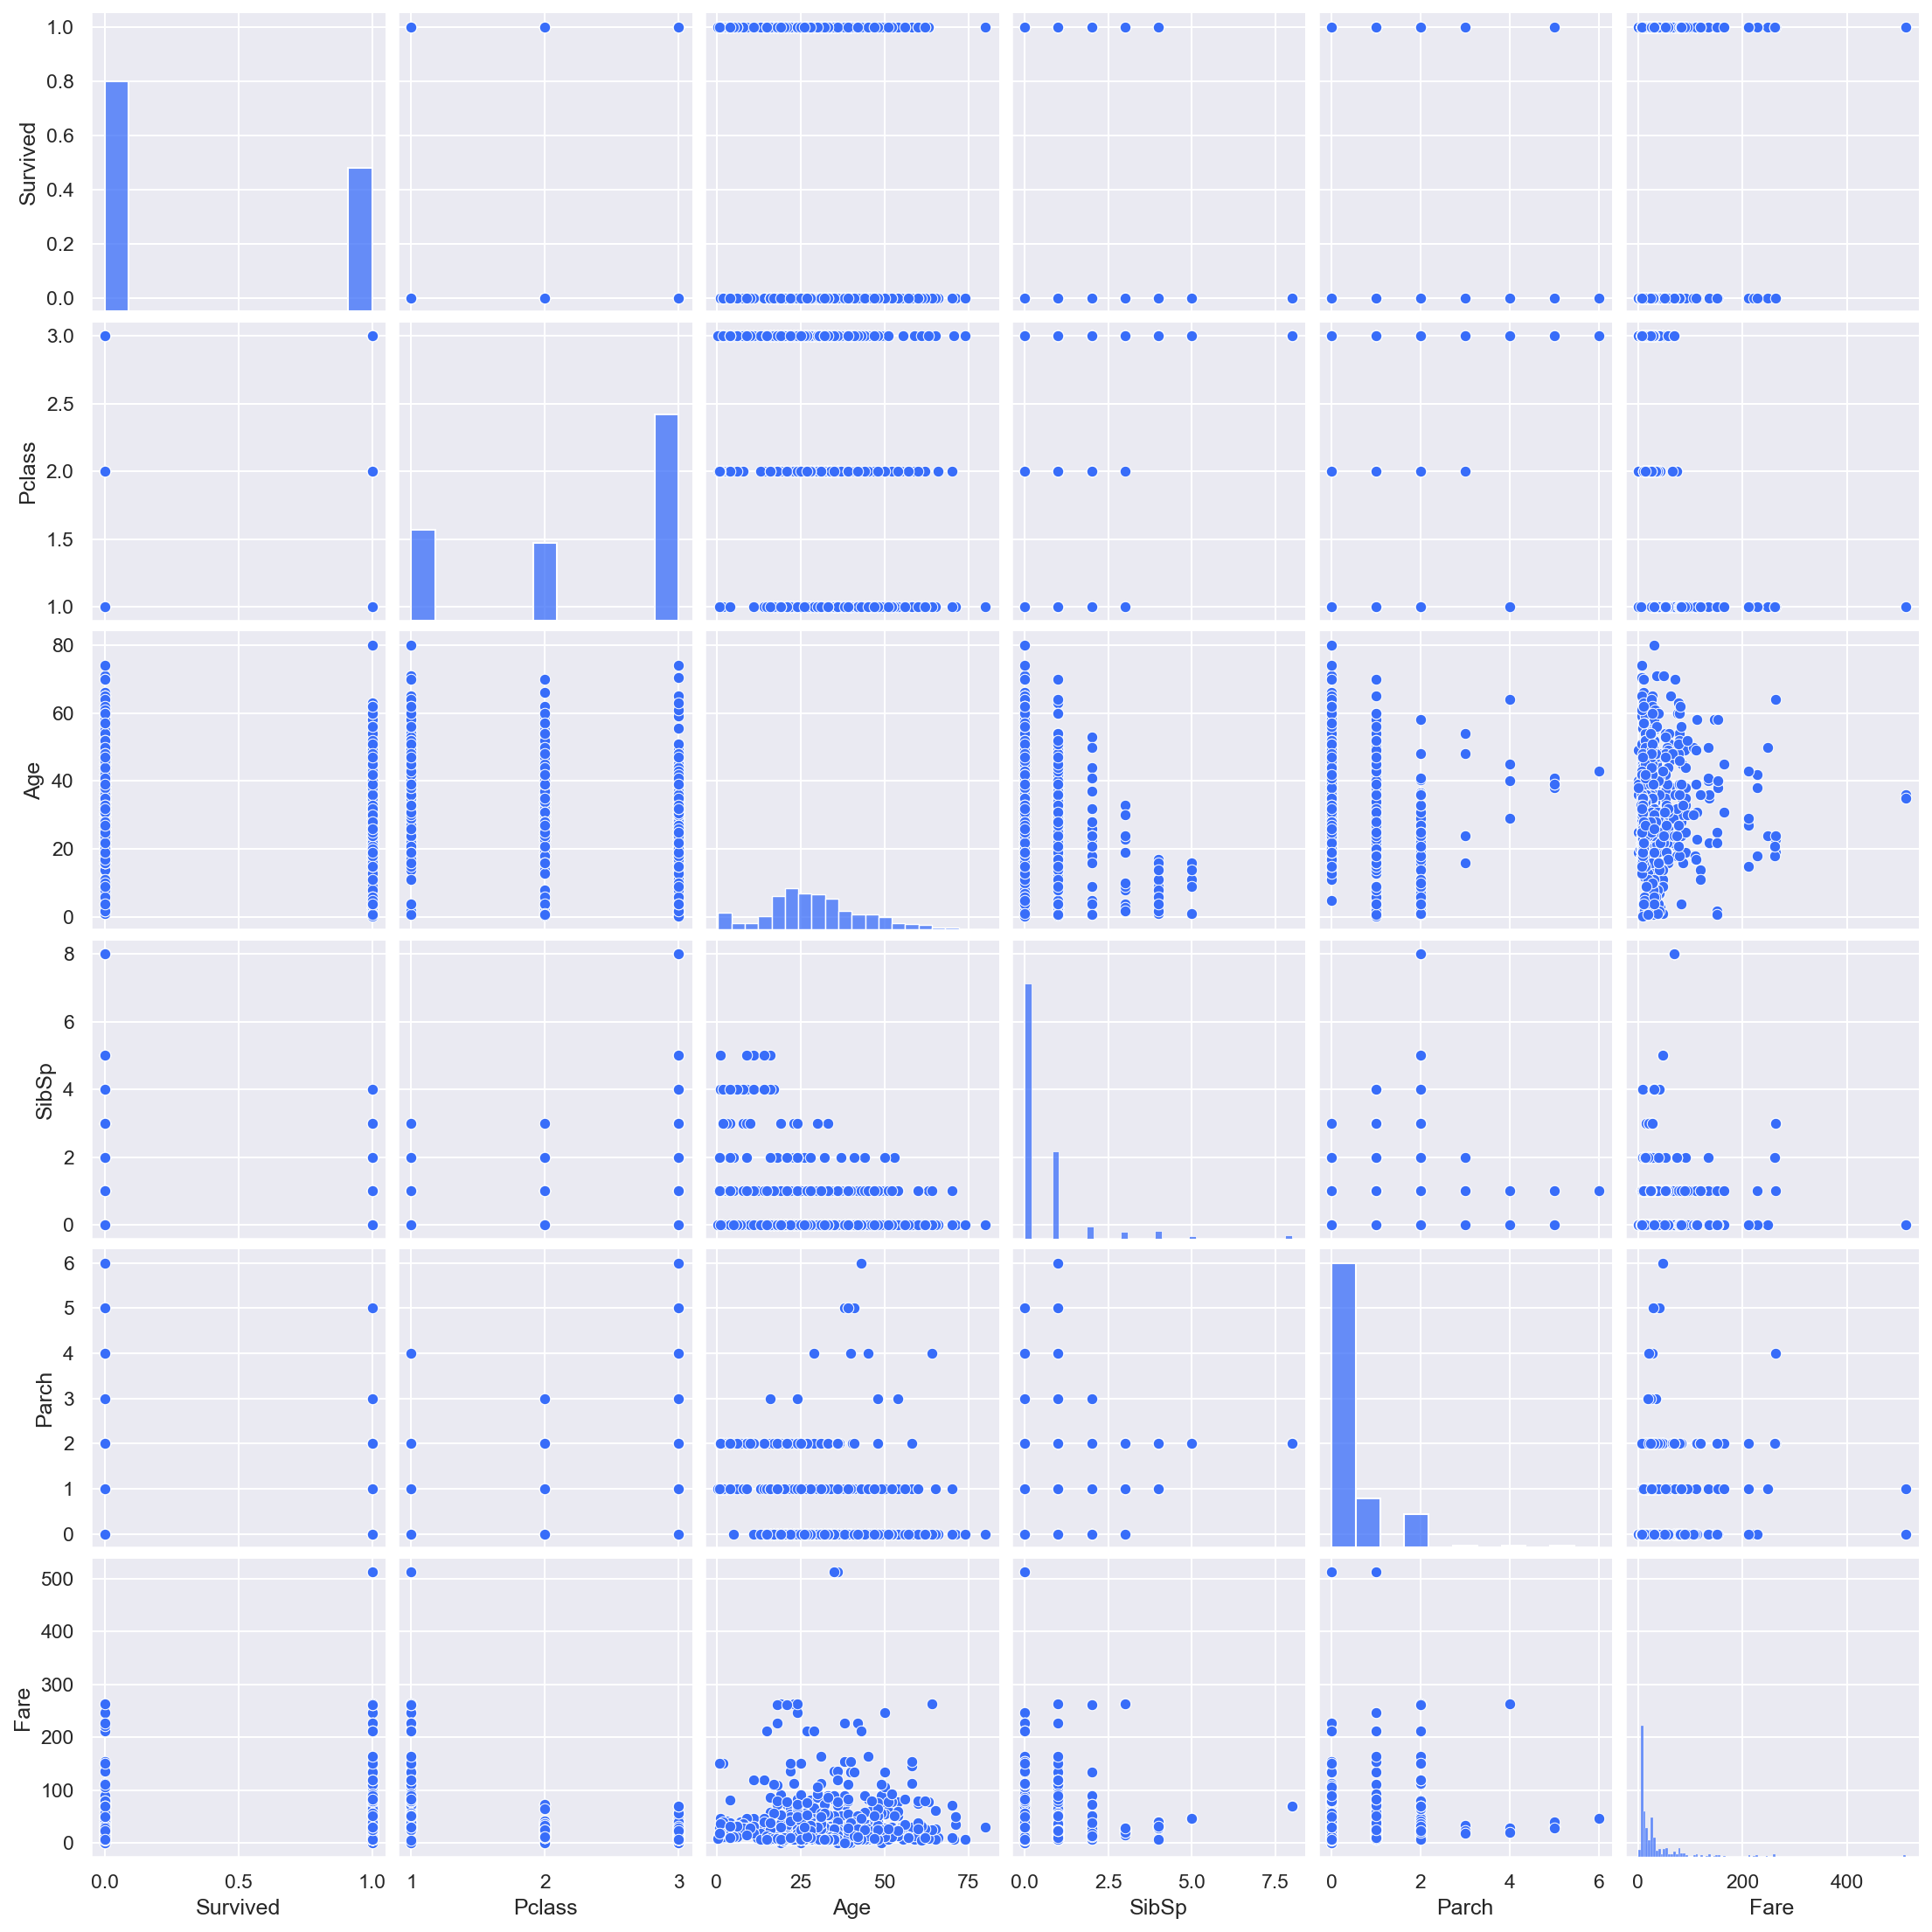

In [17]:
sns.pairplot(train_data)

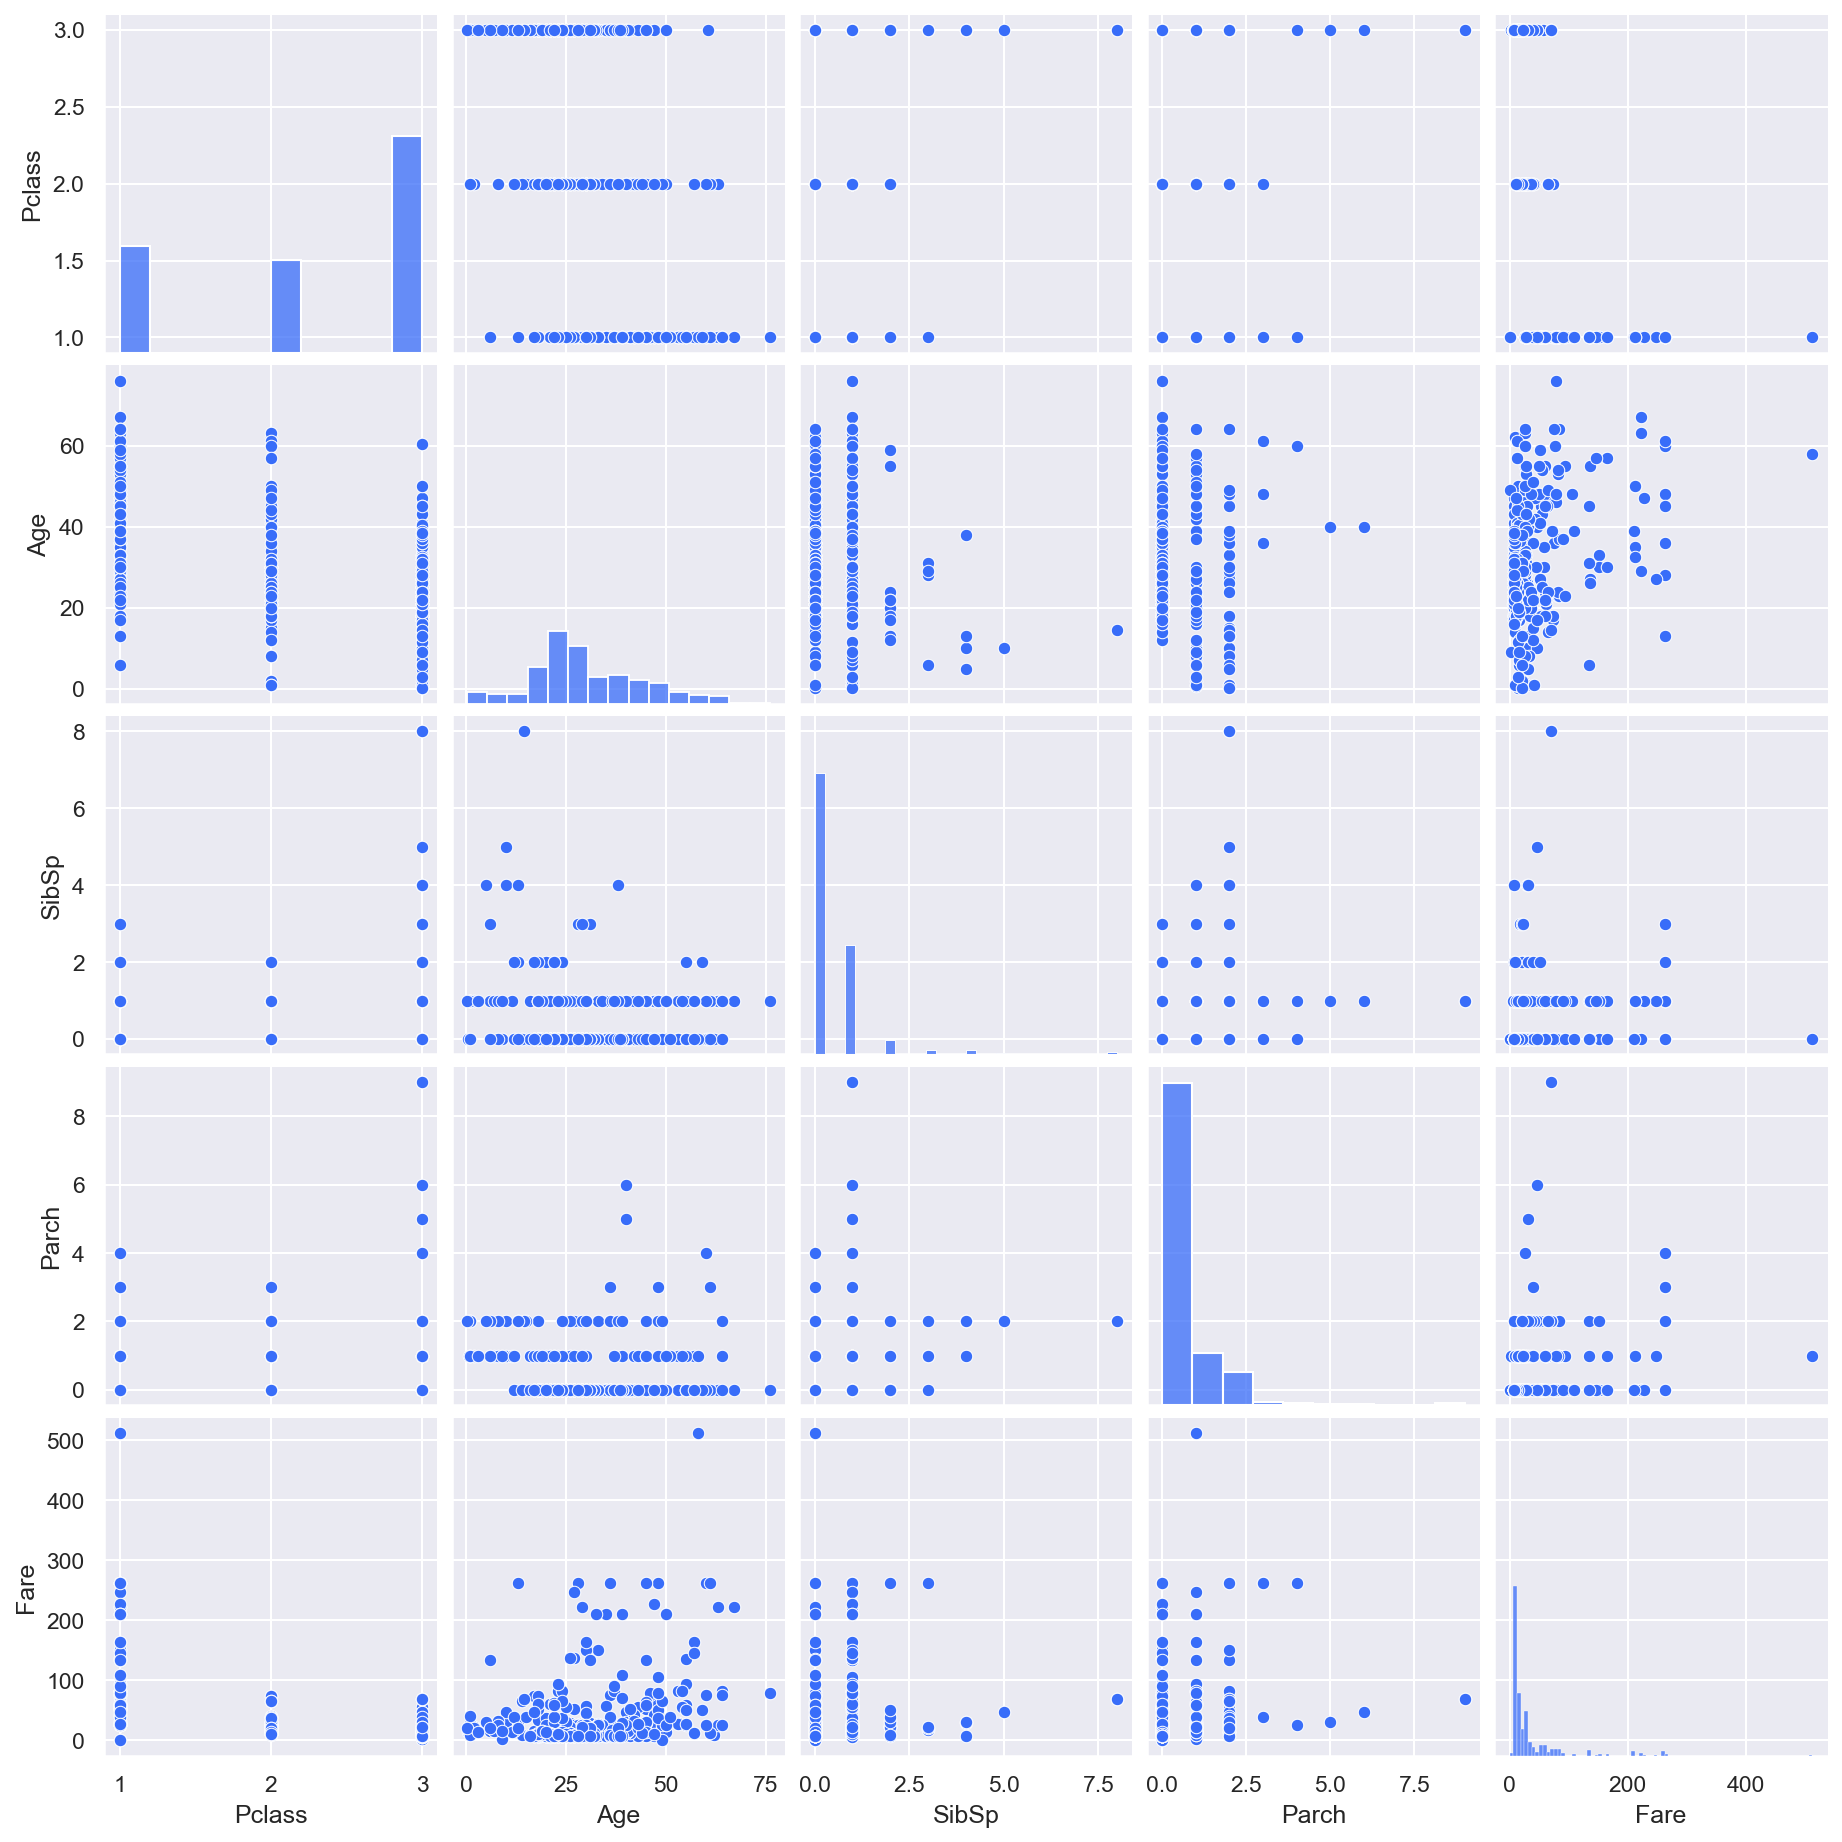

In [18]:
sns.pairplot(test_data)


<Axes: >

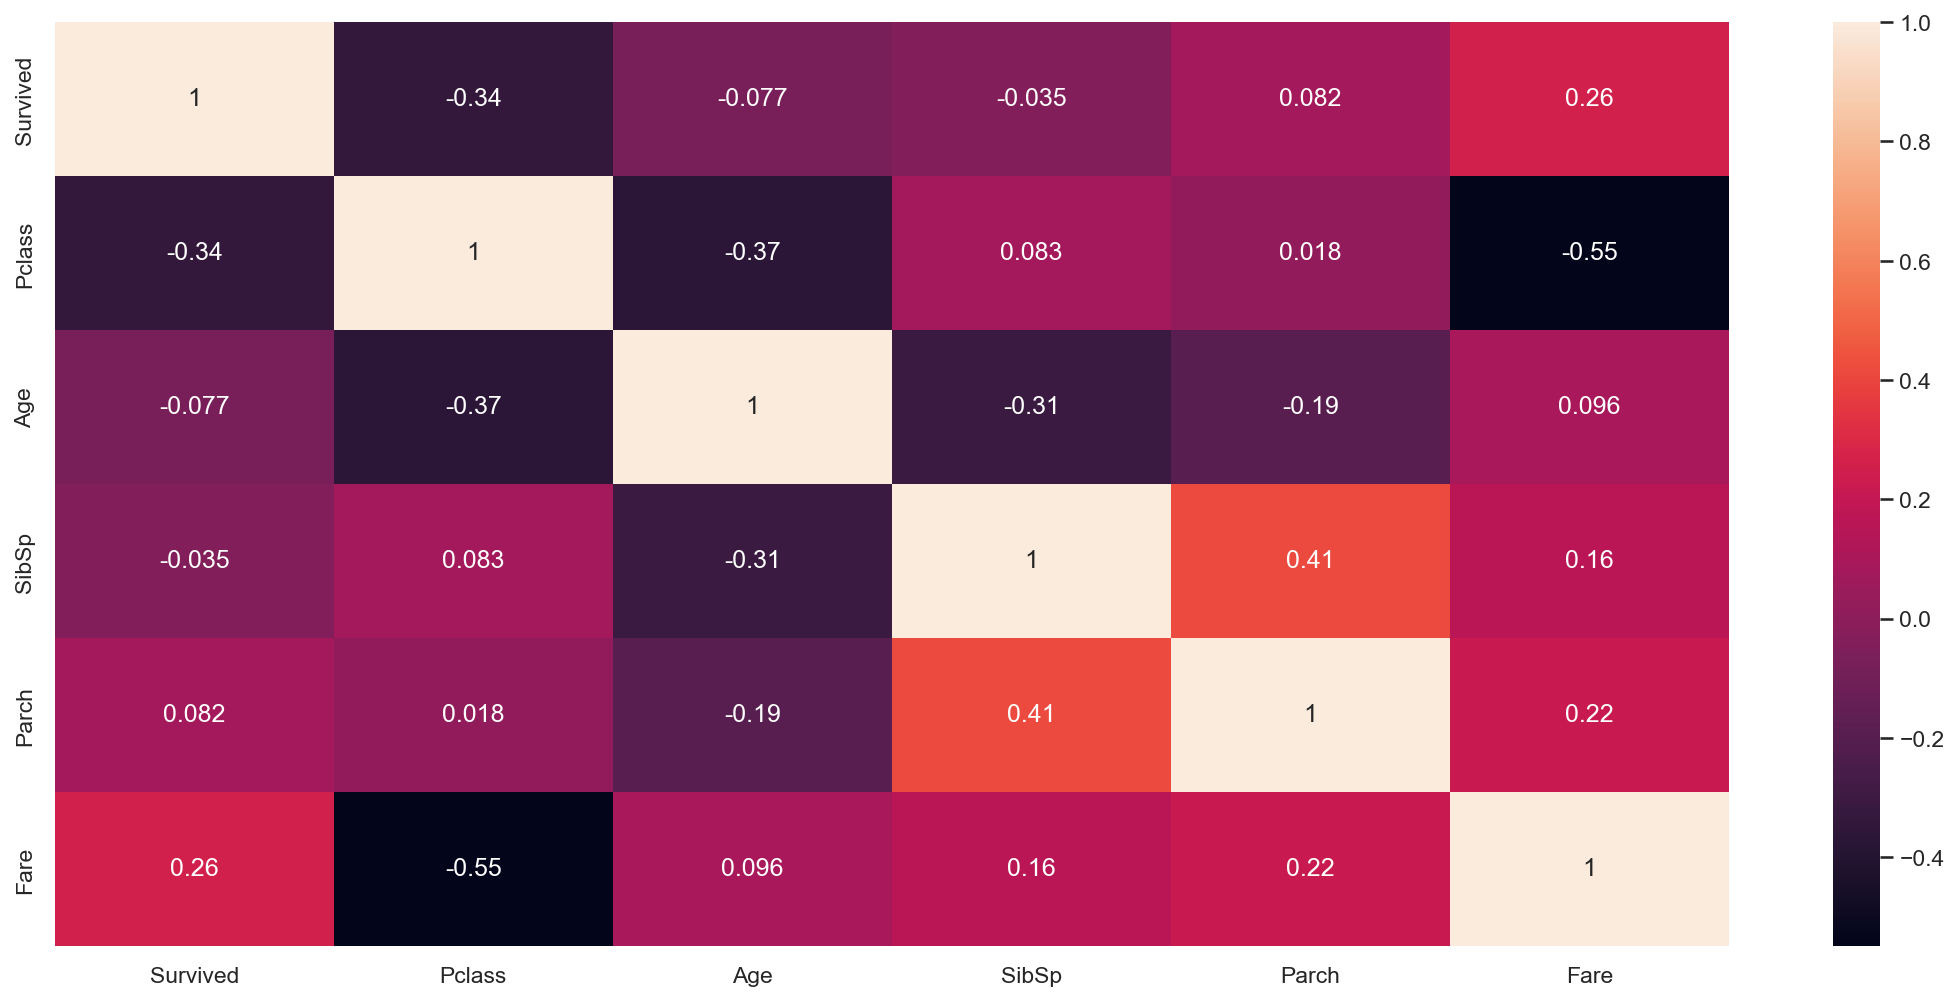

In [19]:
sns.heatmap(train_data[num_columns].corr(), annot=True)

In [20]:
print(train_data['Survived'].value_counts())
print()

total_survived = train_data['Survived'].value_counts()[1]/(train_data['Survived'].value_counts()[0] + train_data['Survived'].value_counts()[1])*100
print(f'Percentage of people survived : {round(total_survived,2)}')

Survived
0    549
1    342
Name: count, dtype: int64

Percentage of people survived : 38.38


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


<Axes: >

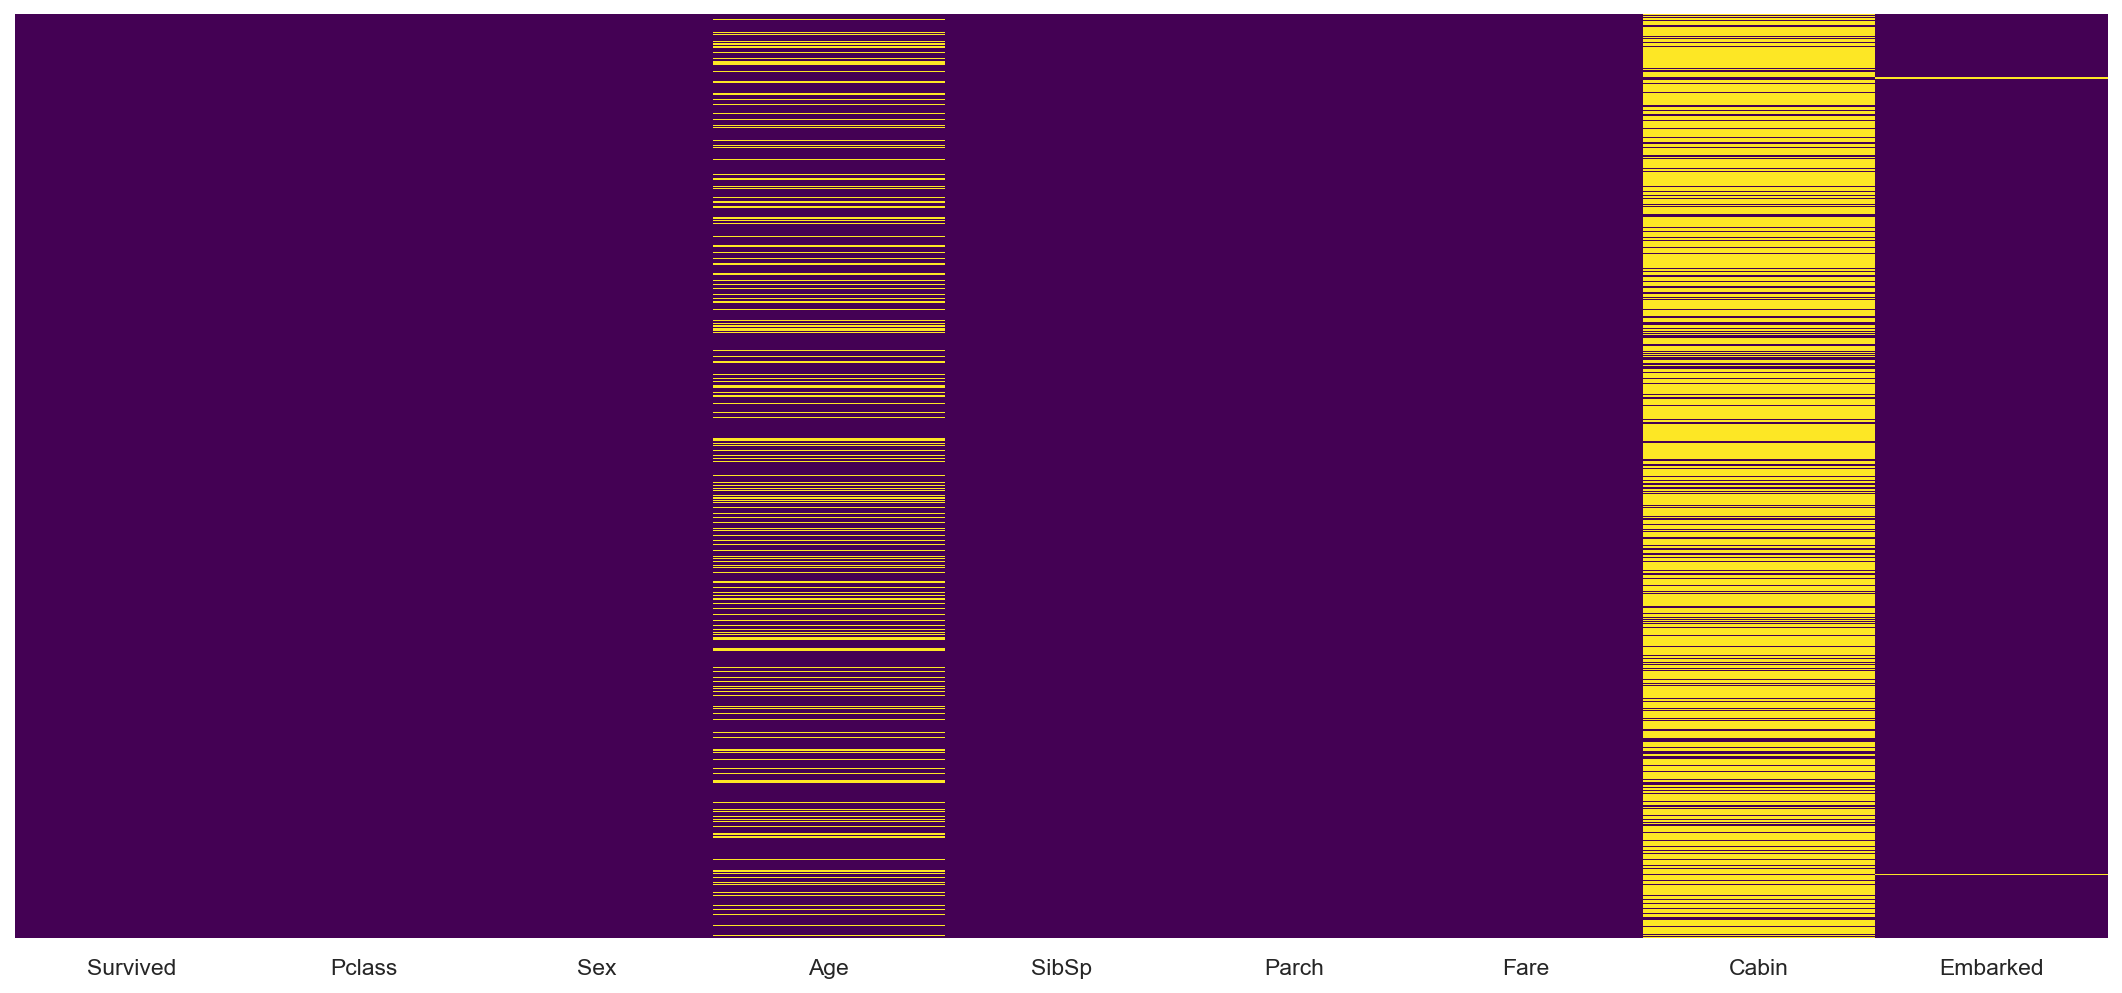

In [22]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<Axes: >

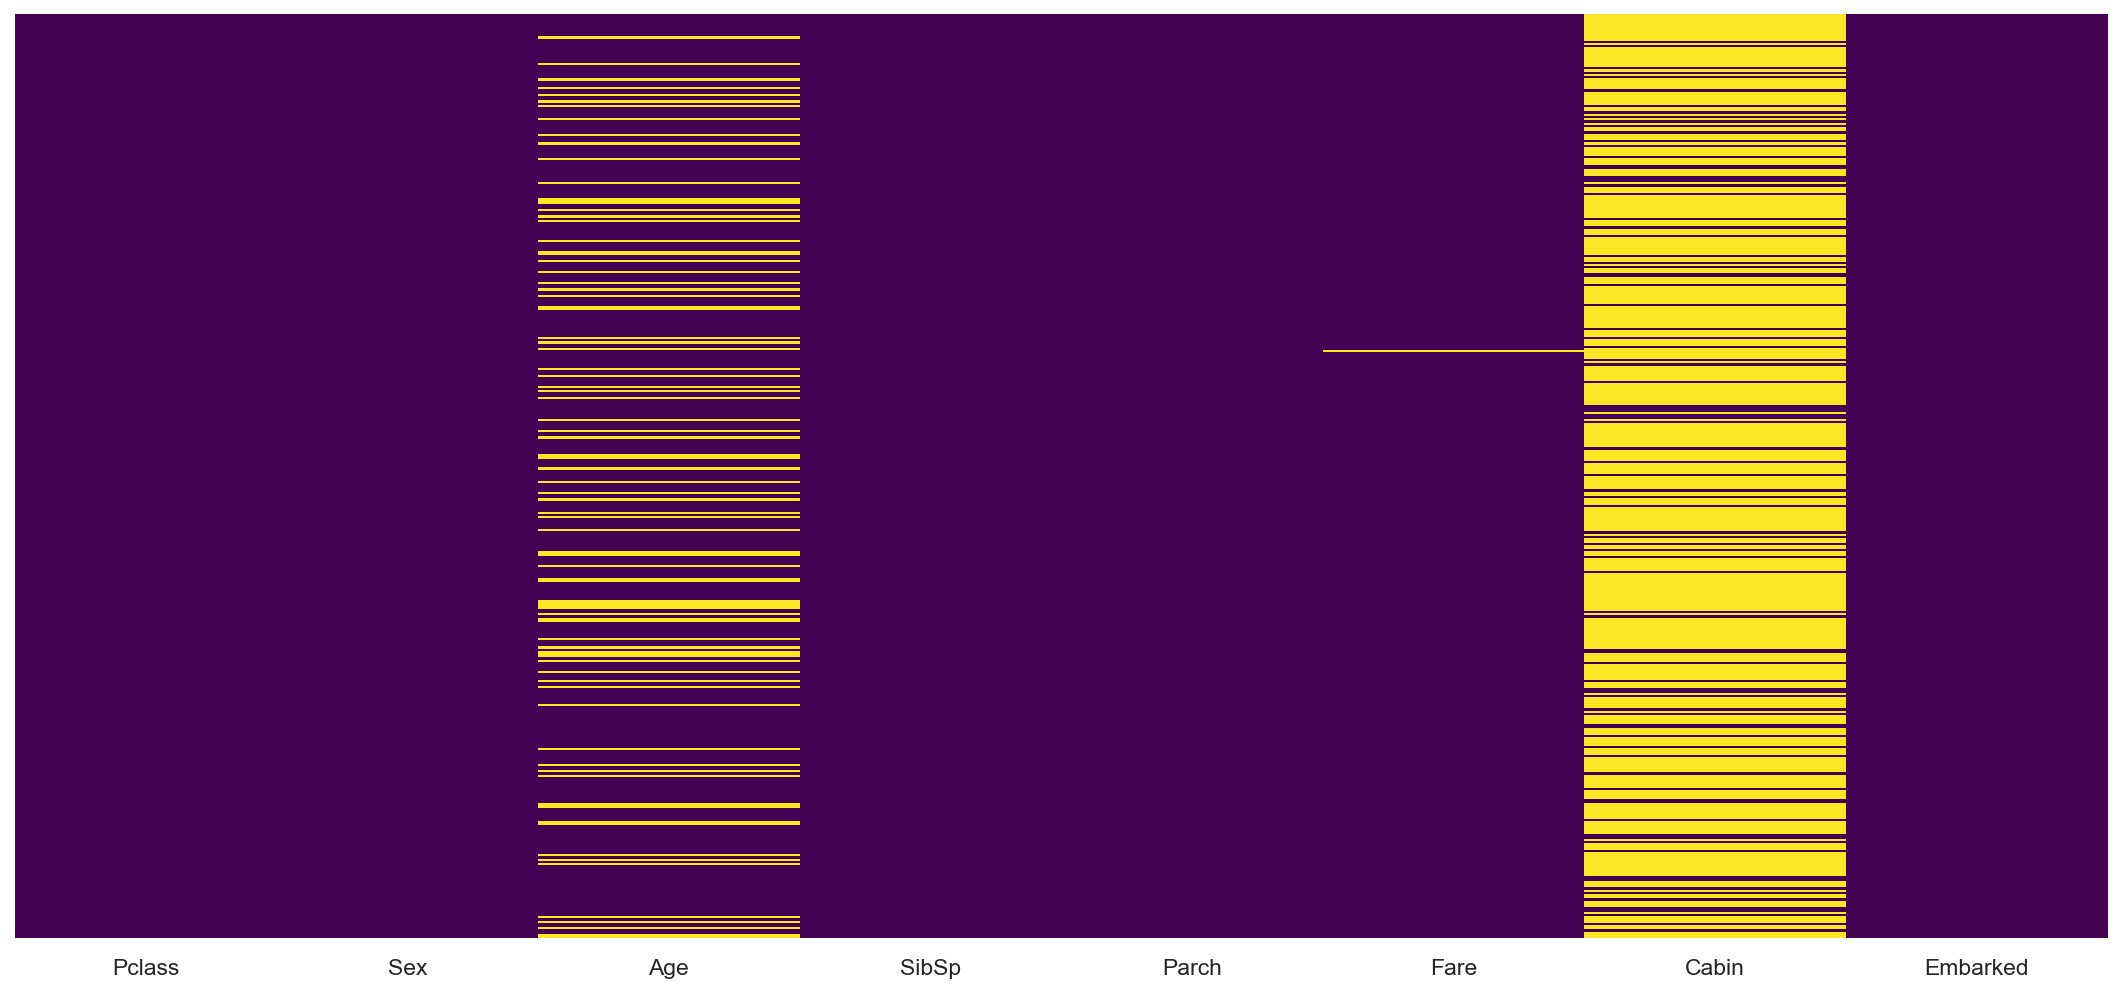

In [23]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [25]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age , axis = 1)
train_data
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age , axis = 1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,24.0,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,24.0,0,0,8.0500,NaN,S


In [26]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_data['Cabin'].isnull().sum()/train_data.shape[0])*100))
print('Percent of missing "Cabin" records is %.2f%%' %((train_data['Embarked'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%
Percent of missing "Cabin" records is 0.22%


In [27]:
# As the percentage of Nan i cabin id more than 50% in training dataset, drop the column and therefore droping the same from test dataset.

train_data.drop('Cabin', axis=1, inplace= True)
test_data.drop('Cabin', axis=1, inplace= True)

In [28]:
test_data.dropna(inplace=True)

<Axes: >

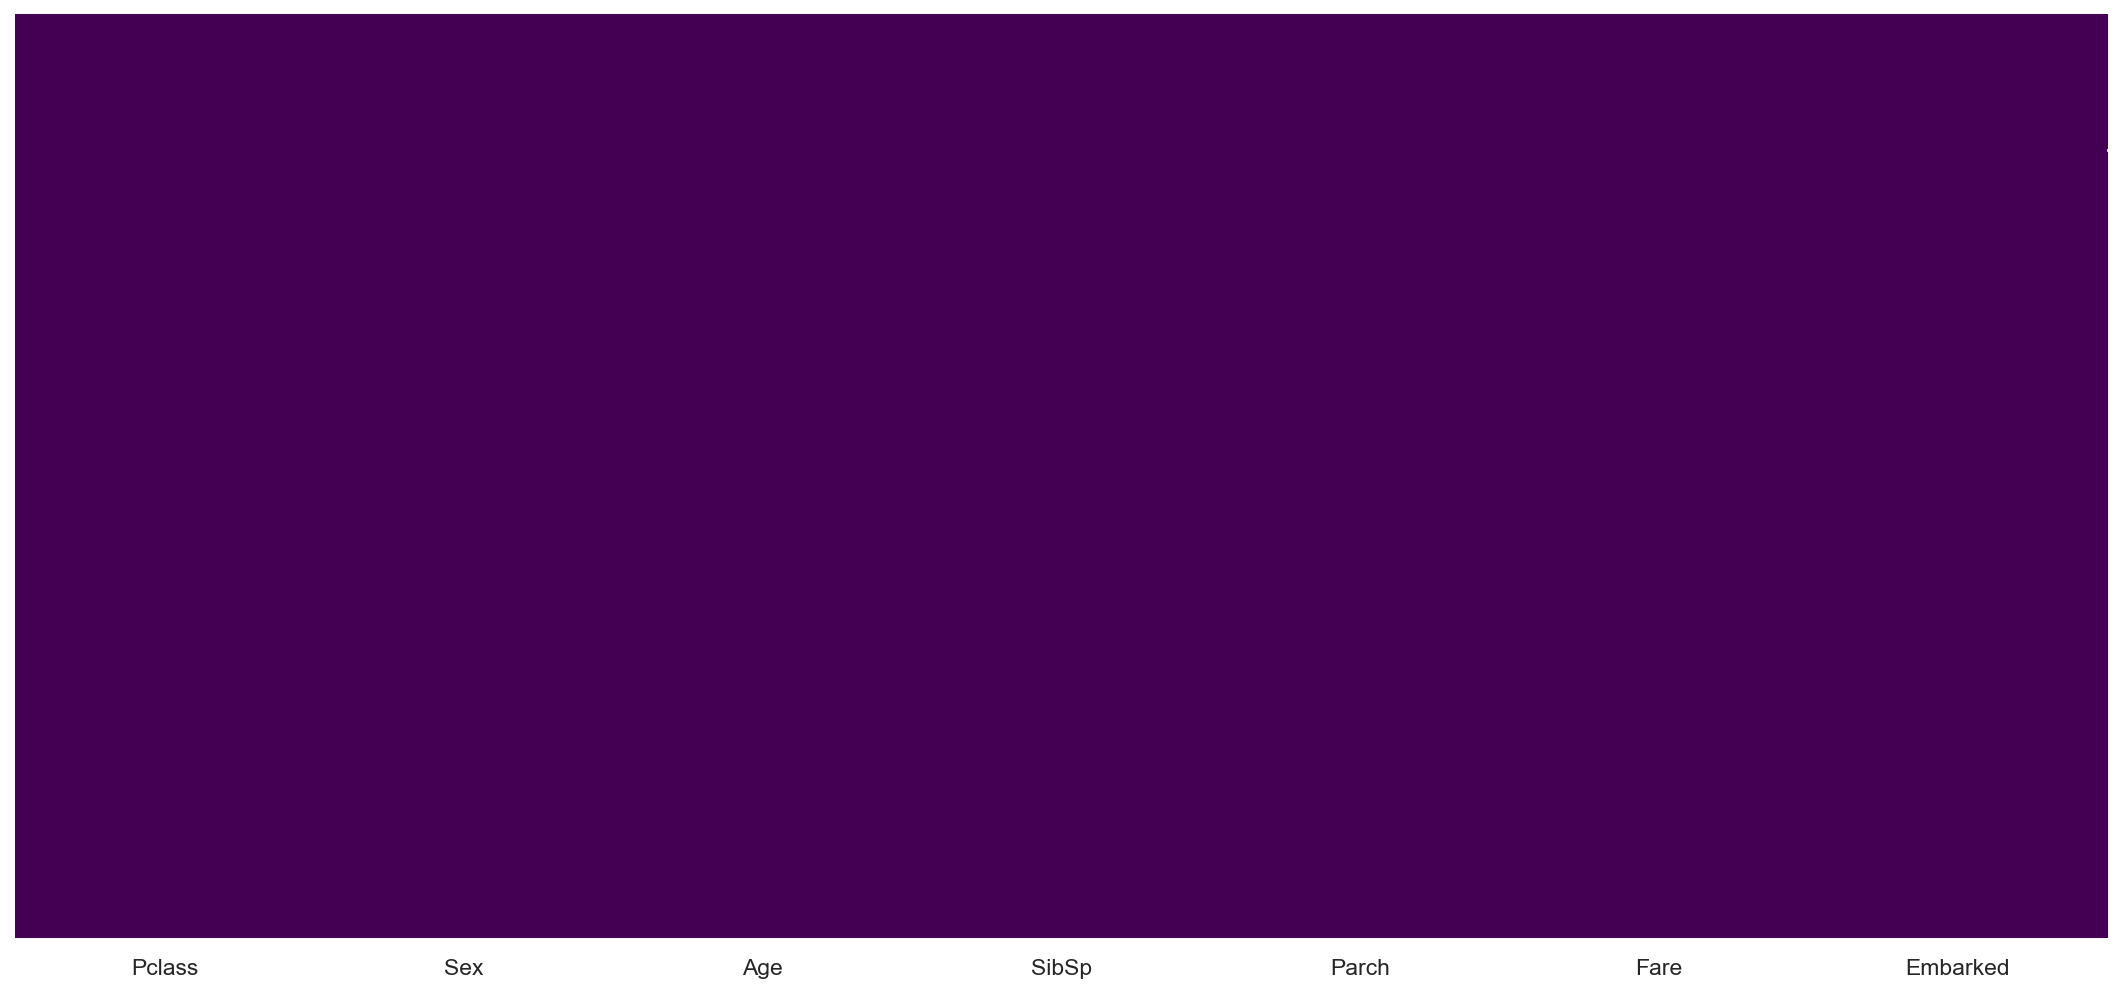

In [29]:
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')
sns.heatmap(test_data.isnull(),yticklabels=False, cbar=False, cmap= 'viridis')

### Data prepprocessing

In [30]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [31]:
# Encoding data for training and testing

le = LabelEncoder()

train_data1 = train_data.copy()
train_data1['Sex']= le.fit_transform(train_data1['Sex'])
train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [32]:
test_data1 = test_data.copy()
test_data1['Sex']= le.fit_transform(test_data1['Sex'])
test_data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [33]:
train_data1 = pd.get_dummies(train_data1, columns=['Embarked'], dtype=int)
train_data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [34]:
test_data1 = pd.get_dummies(test_data1, columns=['Embarked'], dtype=int)
test_data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


## Model building

In [35]:
x = train_data1.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [36]:
y = train_data1['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
!pip install lightgbm
import lightgbm as lgb



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
lgb_model=lgb.LGBMClassifier(verbose=-1 ,random_state=1234)
lgb_model.fit(x, y)

LGBMClassifier(random_state=1234, verbose=-1)

In [39]:
ypred = lgb_model.predict(test_data1)

In [40]:
 print(f" Train Accuracy : {lgb_model.score(x,y)}")

 Train Accuracy : 0.9450056116722784


In [41]:
# Build and train on xgbm
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
ypred1 = xgb_model.predict(test_data1)

In [43]:
 print(f" Train Accuracy : {xgb_model.score(x,y)}")

 Train Accuracy : 0.9663299663299664


## Note: Cannot the do the evaluation part as the testing dataset do not contain the values of target column